

Load the CSV file into a pandas DataFrame after installing any packages needed:

In [224]:
# --- Automatic Installation of Required Libraries ---

import importlib
import subprocess
import sys
import pandas as pd
from scipy import stats
import statsmodels.formula.api as smf
import numpy as np
# Install scikit-learn from within a notebook
!pip install scikit-learn
!pip install --upgrade scikit-learn
!pip install numpy scipy pandas
import sklearn as sklearn


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
# List all required packages
required_packages = [
    "pandas",
    "numpy",
    "matplotlib",
    "seaborn",
    "scipy",
    "plotly", 
    "kaleido"
]

for package in ["nbformat", "notebook", "ipython", "ipywidgets"]:
    try:
        importlib.import_module(package)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        
for package in required_packages:
    try:
        # Try to import the package
        importlib.import_module(package)
        print(f"{package} is already installed.")
    except ImportError:
        # If not installed, install via pip
        print(f"{package} not found. Installing...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Try again to import kaleido, install if missing
try:
    import kaleido
    print("Kaleido is already installed.")
except ImportError:
    print("Kaleido not found. Installing now...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade", "kaleido"])
    print("Kaleido installed successfully. Please restart the kernel.")        

# Now import all packages for use
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t
import itertools
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
import plotly.graph_objects as go
from IPython.display import Image, display

# Install kaleido for static image export
try:
    import kaleido
except ImportError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "kaleido"])
# Upgrade kaleido to the latest version
subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade", "kaleido"])
print("Kaleido has been upgraded. Please restart the kernel for changes to take effect.")    

#Collecting the data:
df = pd.read_csv('insurance.csv')
df.head()


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


pandas is already installed.
numpy is already installed.
matplotlib is already installed.
seaborn is already installed.
scipy is already installed.
plotly is already installed.
kaleido is already installed.
Kaleido is already installed.
Kaleido has been upgraded. Please restart the kernel for changes to take effect.


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Transform part one: Clean Data: Remove duplicates and handle missing values.

Firstly, we checked for missing data. It turned out that there were no (0) missing values for the data analysed for any of the categories.

In [225]:
#Find missing data (code from the LMS and ChatGPT helped me make this):
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

We then searched for duplicate data and removed it (ChatGPT helped me with this)

In [226]:
print("Original DataFrame:")
print(df)

# 🔹 Find and print duplicate rows (excluding first occurrence)
duplicates = df[df.duplicated()]
print("\nDuplicate rows:")
print(duplicates)

# 🔹 Remove duplicates (keep first occurrence)
df_no_duplicates = df.drop_duplicates()

print("\nDataFrame after removing duplicates:")
print(df_no_duplicates)


Original DataFrame:
      age     sex     bmi  children smoker     region       charges
0      19  female  27.900         0    yes  southwest  16884.924000
1      18    male  33.770         1     no  southeast   1725.552300
2      28    male  33.000         3     no  southeast   4449.462000
3      33    male  22.705         0     no  northwest  21984.470610
4      32    male  28.880         0     no  northwest   3866.855200
5      31  female  25.740         0     no  southeast   3756.621600
6      46  female  33.440         1     no  southeast   8240.589600
7      37  female  27.740         3     no  northwest   7281.505600
8      37    male  29.830         2     no  northeast   6406.410700
9      60  female  25.840         0     no  northwest  28923.136920
10     25    male  26.220         0     no  northeast   2721.320800
11     62  female  26.290         0    yes  southeast  27808.725100
12     23    male  34.400         0     no  southwest   1826.843000
13     56  female  39.820   

Transform data part two: Applying any necessary transformations. We've added in a category for BMI (ChatGPT suggested some good category values for us and helped write quick code for it). Unreasonable values for when the data was collected (e.g someone having an age of 130) were also checked for and none appeared.

In [227]:


# Define a function to categorize BMI
def categorize_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 25:
        return "Normal"
    elif 25 <= bmi < 30:
        return "Overweight"
    else:
        return "Obese"

# Apply function to create a new column
df['bmi_category'] = df['bmi'].apply(categorize_bmi)

#Clean dataframe in place: fix types, strip spaces, handle missing, encode. (code from  ChatGPT helped me make this):
def transform_clean(df):
    
    df = df.copy()
    # strip and lower string columns
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].astype(str).str.strip()
    # numeric coercion for known numeric columns
    for col in ['age','bmi','children','charges']:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    # mapping / encoding (safe)
    if 'sex' in df.columns:
        df['sex'] = df['sex'].str.lower().map({'female':0,'male':1})
    if 'smoker' in df.columns:
        df['smoker'] = df['smoker'].str.lower().map({'no':0,'yes':1})
    return df    

#Check for unreasonable values (e.g unnrealistic values for BMI and age at the time of dataset being collected) and handle them.
def validate_df(df):
    errors = []
    # shape
    if df.empty:
        errors.append("DataFrame is empty.")
    # ranges
    if df['age'].min() < 0 or df['age'].max() > 130:
        errors.append("Age out of expected range.")
        print(errors)
    if (df['bmi'] < 10).any() or (df['bmi'] > 80).any():
        errors.append("BMI has out-of-range values.")
        print(errors)
    if (df['children'] < 0).any() or (df['children'] > 20).any():
        errors.append("Children out-of-range.")
        print(errors)
# === ETL Pipeline Wrapper ===
def etl_pipeline(filepath: str):
    """
    End-to-end ETL pipeline:
    - Extract: Load dataset from CSV
    - Transform: Clean, encode, and add BMI categories
    - Load: Return a ready-to-analyze DataFrame
    - Validate: Run quality checks and print issues
    """
    # Extract
    df = pd.read_csv(filepath)

    # Transform (clean + encode)
    df = transform_clean(df)

    # Add BMI categories
    df["bmi_category"] = df["bmi"].apply(categorize_bmi)

    # Validate
    validate_df(df)

    # Load (return cleaned DataFrame)
    return df

# === Run the ETL pipeline ===
df_clean = etl_pipeline("insurance.csv")

# Quick check
df_clean.head()

# Show first 10 rows to check
transform_clean(df)
validate_df(df)
print(df.head(10))




   age     sex     bmi  children smoker     region      charges bmi_category
0   19  female  27.900         0    yes  southwest  16884.92400   Overweight
1   18    male  33.770         1     no  southeast   1725.55230        Obese
2   28    male  33.000         3     no  southeast   4449.46200        Obese
3   33    male  22.705         0     no  northwest  21984.47061       Normal
4   32    male  28.880         0     no  northwest   3866.85520   Overweight
5   31  female  25.740         0     no  southeast   3756.62160   Overweight
6   46  female  33.440         1     no  southeast   8240.58960        Obese
7   37  female  27.740         3     no  northwest   7281.50560   Overweight
8   37    male  29.830         2     no  northeast   6406.41070   Overweight
9   60  female  25.840         0     no  northwest  28923.13692   Overweight


Code has also been used to automate the ETL process and makes it reusable for future datasets.

In [228]:
# -----------------------------
# ADDITION: Automated ETL Pipeline 
# -----------------------------
def etl_pipeline(file_path):
    """
    Automated ETL pipeline for insurance dataset:
    - Extract
    - Transform
    - Load
    - Validate
    """
    df = pd.read_csv(file_path)
    
    # Remove duplicates
    df = df.drop_duplicates()
    
    # BMI categories
    def categorize_bmi(bmi):
        if bmi < 18.5: return "Underweight"
        elif 18.5 <= bmi < 25: return "Normal"
        elif 25 <= bmi < 30: return "Overweight"
        else: return "Obese"
    df['bmi_category'] = df['bmi'].apply(categorize_bmi)
    
    # Encode categorical variables
    df['sex'] = df['sex'].str.lower().map({'female':0,'male':1})
    df['smoker'] = df['smoker'].str.lower().map({'no':0,'yes':1})
    df['region'] = df['region'].astype('category').cat.codes
    
    # Validate ranges
    assert df['age'].between(0,130).all(), "Age out of range"
    assert df['bmi'].between(10,80).all(), "BMI out of range"
    assert df['children'].between(0,20).all(), "Children out of range"
    
    return df

# Usage
df_clean = etl_pipeline('insurance.csv')
df_clean.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,0,27.900,0,1,3,16884.92400,Overweight
1,18,1,33.770,1,0,2,1725.55230,Obese
2,28,1,33.000,3,0,2,4449.46200,Obese
3,33,1,22.705,0,0,1,21984.47061,Normal
4,32,1,28.880,0,0,1,3866.85520,Overweight


Here is the start of some some exploratory data analysis for the data. Bar Charts and pie charts were then incluced for categorical variables to see what proportion of the sample as a whole contained each category.

This bar charts and pie charts in different ways to that a little over half of the people in the data are obese, about four in five people are not smokers and about two in three people do not have two or more children (while the vast majority of people in the data have three children or less). If obesity or being smokers have an impact on insurance data, this information will have an effect on the sample of data. 

The biological sex of individuals in the data appear to be roughtly half male and half female while there are a relatively equal amount of people in the data who live in each region. 



C:\Users\joshu\AppData\Local\Temp\ipykernel_17520\3590636960.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




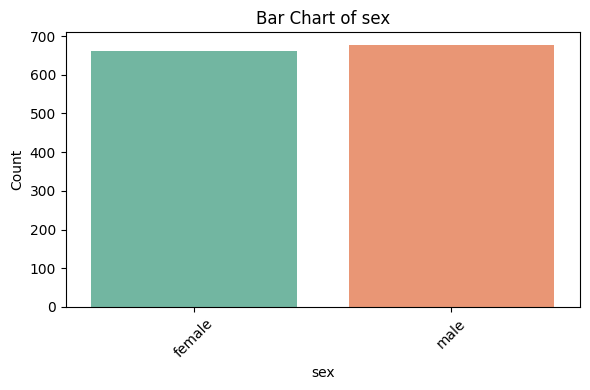

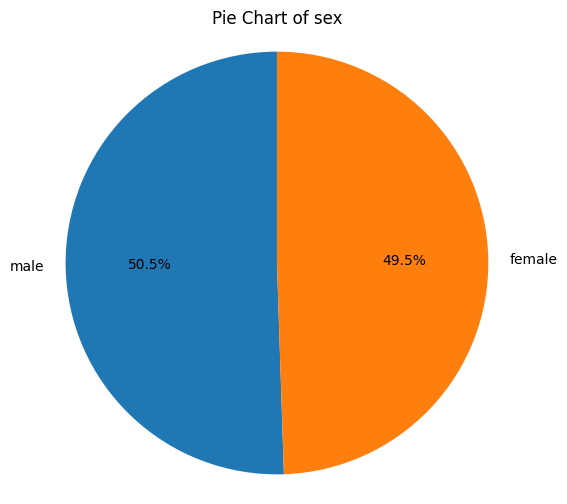

C:\Users\joshu\AppData\Local\Temp\ipykernel_17520\3590636960.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




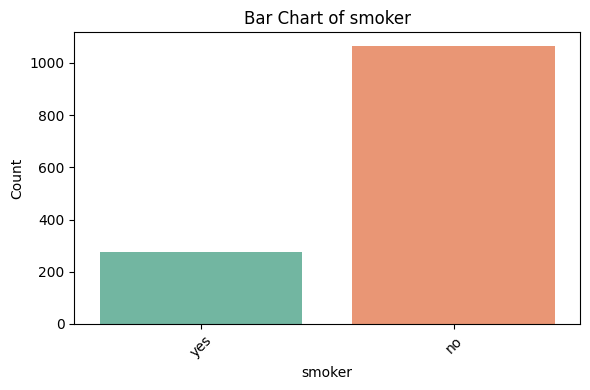

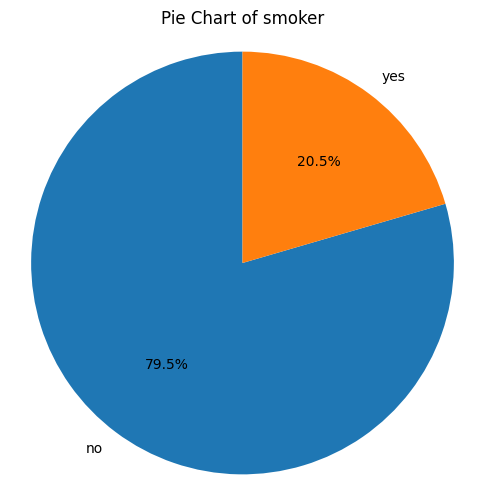

C:\Users\joshu\AppData\Local\Temp\ipykernel_17520\3590636960.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




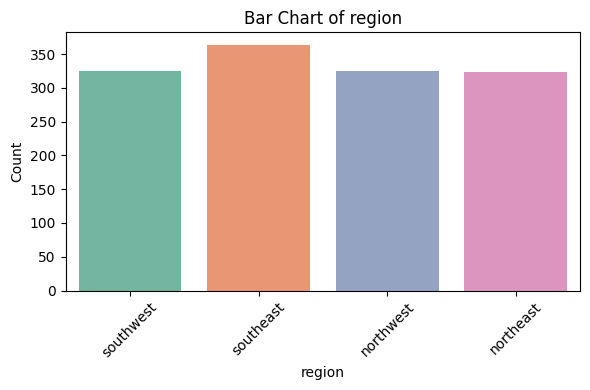

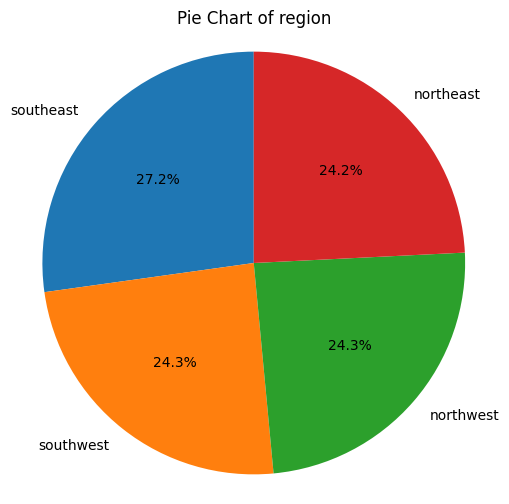

C:\Users\joshu\AppData\Local\Temp\ipykernel_17520\3590636960.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




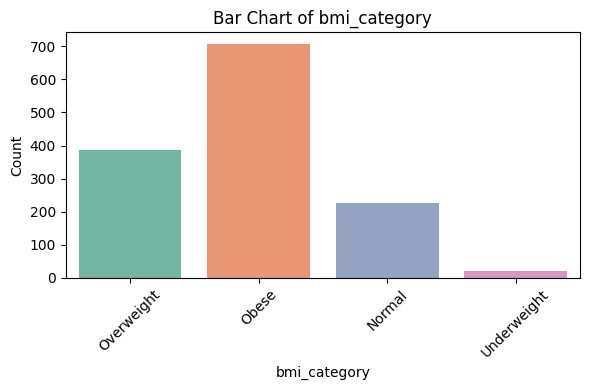

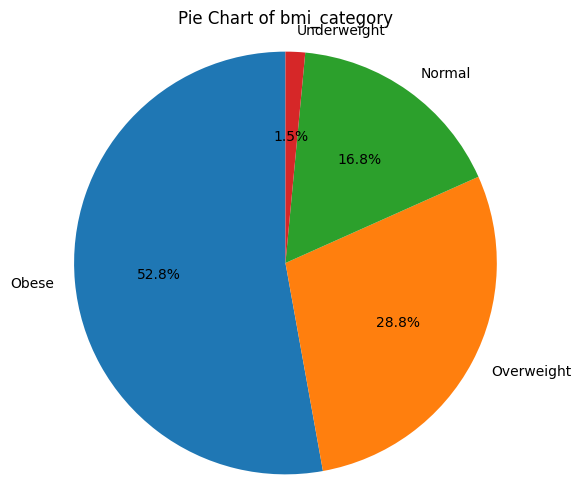

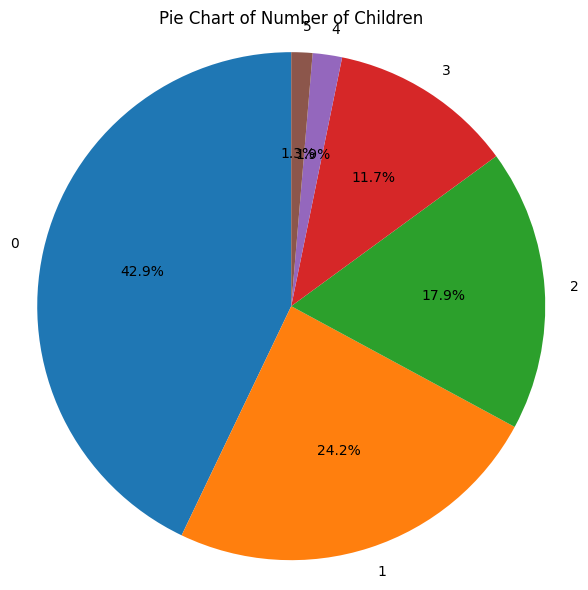

In [229]:
#Describe the data
df.describe()
# -----------------------------
# Bar charts and Pie charts for categorical variables
# -----------------------------

# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
# Include encoded categorical columns explicitly
for col in ['sex', 'smoker', 'bmi_category']:
    if col in df.columns and col not in categorical_cols:
        categorical_cols.append(col)

# Loop through each categorical column
for col in categorical_cols:
    counts = df[col].value_counts()
    
    # ---- Bar chart ----
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, palette="Set2")
    plt.title(f"Bar Chart of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # ---- Pie chart ----
    plt.figure(figsize=(6,6))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f"Pie Chart of {col}")
    plt.axis('equal')  # Equal aspect ratio ensures pie is circular
    plt.show()

 
# -----------------------------
# Pie chart for number of children
children_counts = df['children'].value_counts().sort_index()

plt.figure(figsize=(6,6))
plt.pie(children_counts, labels=children_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Pie Chart of Number of Children")
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.tight_layout()
plt.show()






Here are some bar charts and boxplots have been used to explore how the variables biological sex, age, gender, region indivually relate to age. 


What the bar charts and boxplots tell us about biological sex:

Despite (as shown by the pie charts previously) the data containing a roughly equal number of males and females, the boxplot shows that the insurance charges for males have a lot more variability than the insurance charge for females. 



What the bar charts and boxplots tell us about age:
The boxplots and bar charts clearly show that as age increases, insurance charges also tends to increase.




What the bar charts and boxplots tell us about region:
The average charges seemed fairly close to each other and their distribution (spread) seems also somewhat close although a little higher in the east than the west. The South east region has more variability in the spread of charges which could be due to the result of the south east having a larger number of observations than the other three regions.



What the bar chart and boxplots tell us about smokers:
People who smoke have much higher insurance charges than people who do not smoke.



What the bar chart and boxplots tell us about having children:
People with two to three children have higher insurance charges on average than people with 0 to 1 children. People with 4 to 5 children appear to have less insurance charges, however given how small a percentage of the data has 4 or more children, meaningful conclusions likely cannot be drawn from that small sample of data for people with over three children.



What the bar chart and boxplots tell us about BMI Categories:

While the BMI categories in the pie charts helpfully told us that most people in the dataset are Obese, it wasn't clear to me from the boxplots whether or not the charges tended to increase with BMI (although the bar charts incidated this, the small difference between "Normal" and "Overweight" made it tricky for me to tell if this was a clear pattern).

For that reason, later on in this notebook (after the code and output shown just below) boxplots showing Insurances Charges by bmi (without categories) made this more clear (at least to me) that as bmi increases, Insurance charges does increase.


--- Descriptive Statistics ---

Average charges by age group:
  age_group       charges
0   [0, 20)   8457.112375
1  [20, 30)   9561.751018
2  [30, 40)  11738.784117
3  [40, 50)  14399.203564
4  [50, 60)  16495.232665
5  [60, 70)  21248.021885
6  [70, 80)           NaN

Average charges by gender:
      sex       charges
0  female  12569.578844
1    male  13974.998864

Average charges by region:
      region       charges
0  northwest  13406.384516
1  southeast  12450.840844
2  southwest  14735.411438
3  northeast  12346.937377

Average charges by BMI category:
  bmi_category       charges
0       Normal  10409.337709
1        Obese  15552.335469
2   Overweight  10987.509891
3  Underweight   8852.200585

Average charges by smoker:
  smoker       charges
0     no   8440.660307
1    yes  32050.231832


C:\Users\joshu\AppData\Local\Temp\ipykernel_17520\2713693018.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



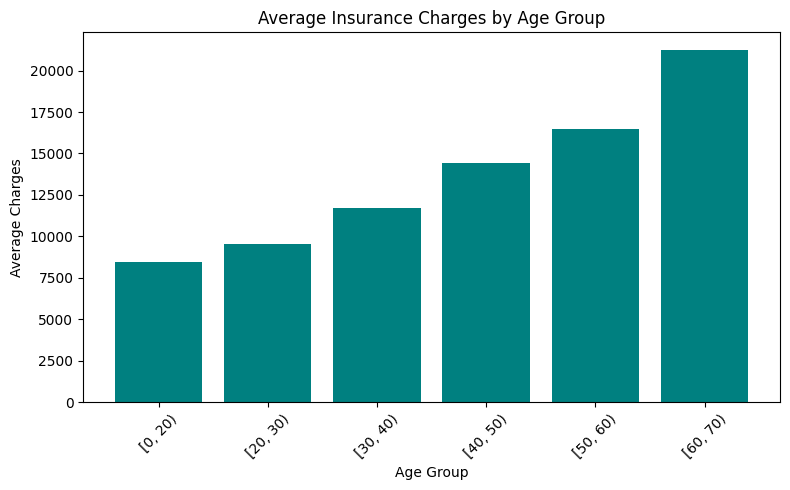

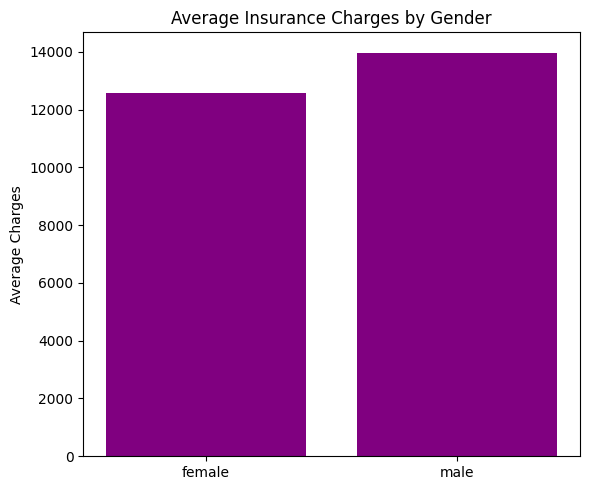

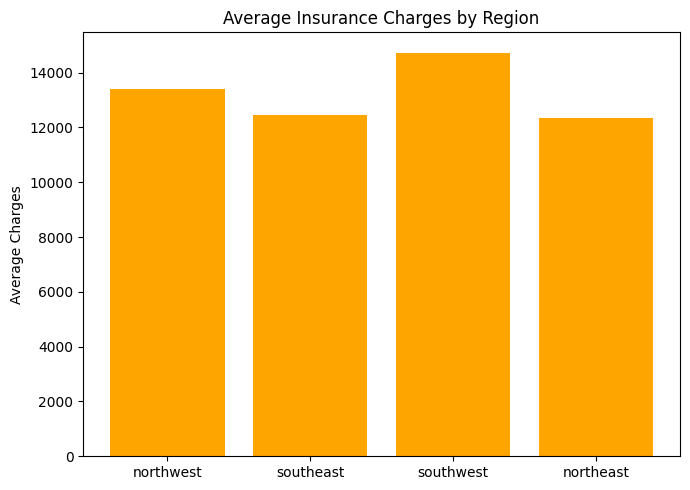

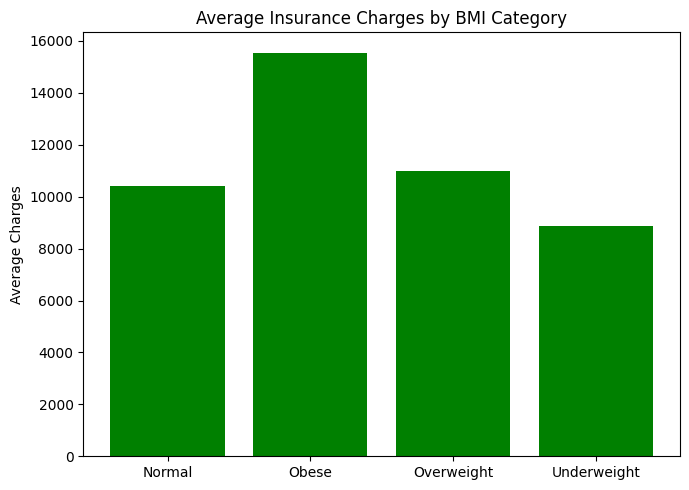

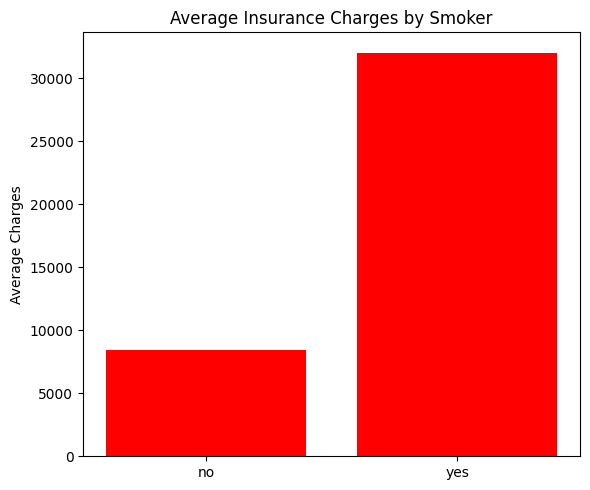


--- Boxplots of Charges by Categories ---


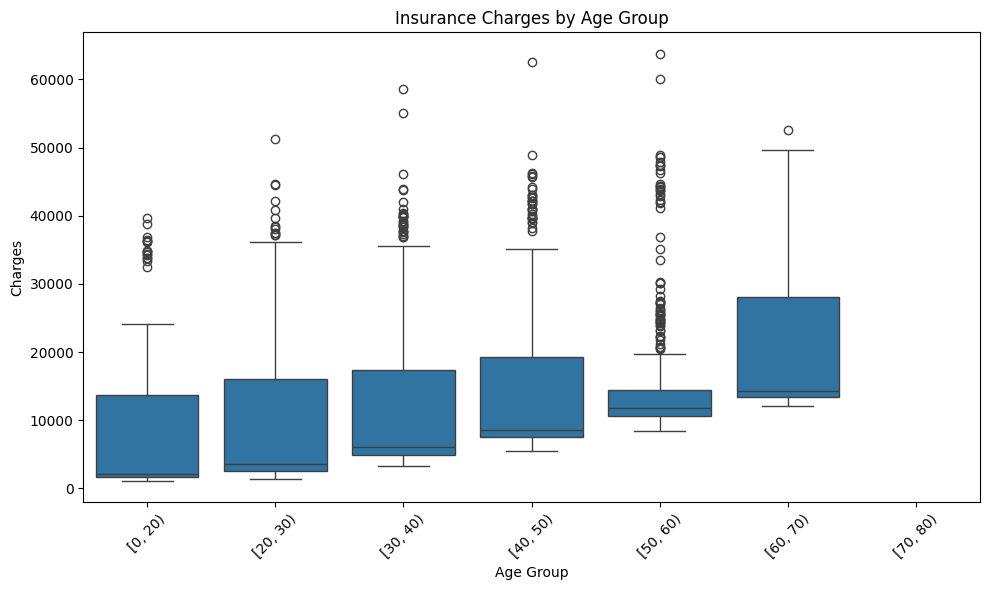

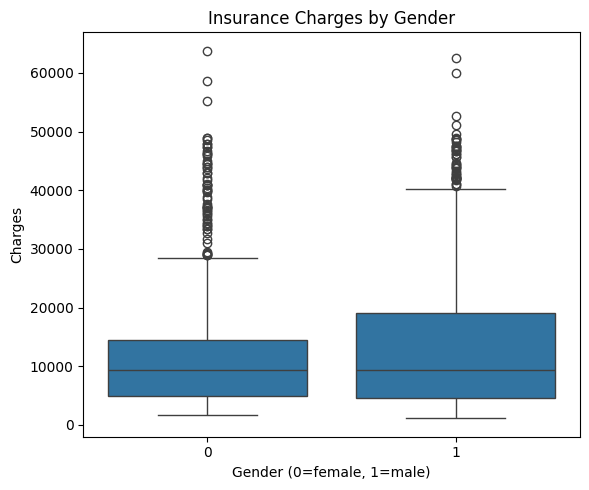

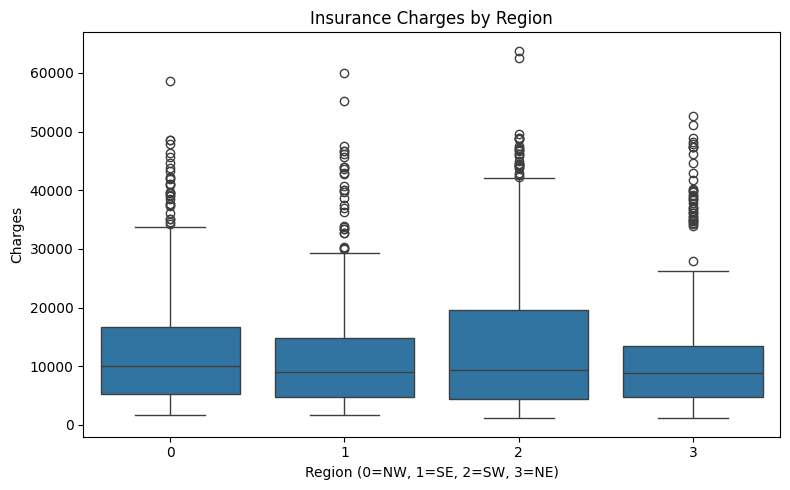

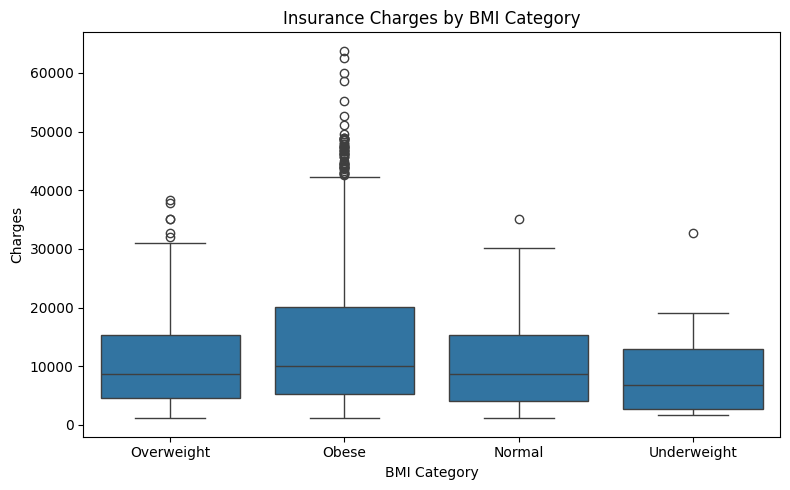

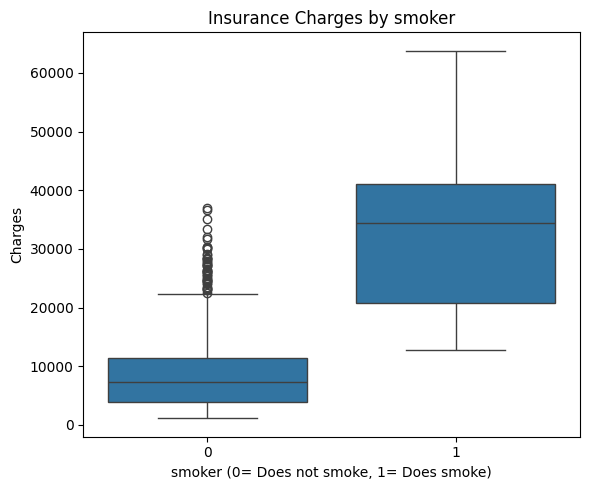


Average charges by number of children:
   children       charges
0         0  12384.695344
1         1  12731.171832
2         2  15073.563734
3         3  15355.318367
4         4  13850.656311
5         5   8786.035247


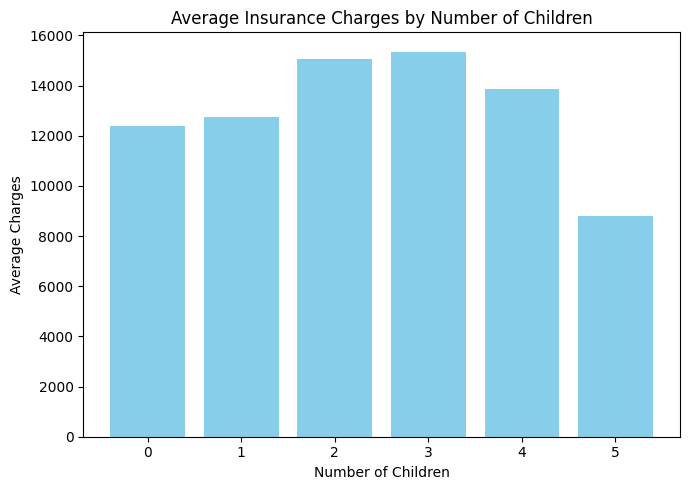

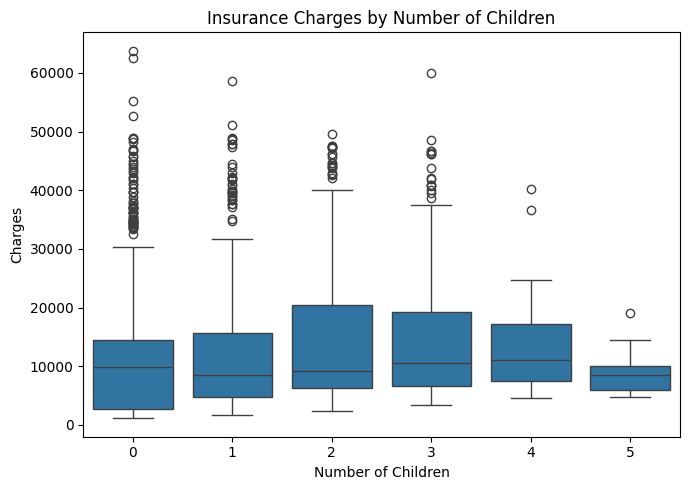

In [230]:
# Descriptive Statistics + Bar Charts
# -----------------------------

print("\n--- Descriptive Statistics ---")
df_reg = df_clean.copy()

# Age group bins
df_reg['age_group'] = pd.cut(df_reg['age'], bins=[0,20,30,40,50,60,70,80], right=False)

# Average charges by age group
avg_by_age = df_reg.groupby('age_group')['charges'].mean().reset_index()
print("\nAverage charges by age group:")
print(avg_by_age)

# Average charges by gender
avg_by_gender = df_reg.groupby('sex')['charges'].mean().reset_index()
avg_by_gender['sex'] = avg_by_gender['sex'].map({0:'female', 1:'male'})
print("\nAverage charges by gender:")
print(avg_by_gender)

# Average charges by region
region_map = {0:'northwest', 1:'southeast', 2:'southwest', 3:'northeast'}
avg_by_region = df_reg.groupby('region')['charges'].mean().reset_index()
avg_by_region['region'] = avg_by_region['region'].map(region_map)
print("\nAverage charges by region:")
print(avg_by_region)

# Average charges by BMI category
avg_by_bmi = df.groupby('bmi_category')['charges'].mean().reset_index()
print("\nAverage charges by BMI category:")
print(avg_by_bmi)

# Average charges by Smoker status
avg_by_smoker = df_reg.groupby('smoker')['charges'].mean().reset_index()
avg_by_smoker['smoker'] = avg_by_smoker['smoker'].map({0:'no', 1:'yes'})
print("\nAverage charges by smoker:")
print(avg_by_smoker)

# -----------------------------
# Bar Charts
# -----------------------------
plt.figure(figsize=(8,5))
plt.bar(avg_by_age['age_group'].astype(str), avg_by_age['charges'], color='teal')
plt.title("Average Insurance Charges by Age Group")
plt.ylabel("Average Charges")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,5))
plt.bar(avg_by_gender['sex'], avg_by_gender['charges'], color='purple')
plt.title("Average Insurance Charges by Gender")
plt.ylabel("Average Charges")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,5))
plt.bar(avg_by_region['region'], avg_by_region['charges'], color='orange')
plt.title("Average Insurance Charges by Region")
plt.ylabel("Average Charges")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,5))
plt.bar(avg_by_bmi['bmi_category'], avg_by_bmi['charges'], color='green')
plt.title("Average Insurance Charges by BMI Category")
plt.ylabel("Average Charges")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,5))
plt.bar(avg_by_smoker['smoker'], avg_by_smoker['charges'], color='red')
plt.title("Average Insurance Charges by Smoker")
plt.ylabel("Average Charges")
plt.tight_layout()
plt.show()

# -----------------------------
# Boxplots
# -----------------------------
print("\n--- Boxplots of Charges by Categories ---")

plt.figure(figsize=(10,6))
sns.boxplot(x='age_group', y='charges', data=df_reg)
plt.title("Insurance Charges by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Charges")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,5))
sns.boxplot(x='sex', y='charges', data=df_reg)
plt.title("Insurance Charges by Gender")
plt.xlabel("Gender (0=female, 1=male)")
plt.ylabel("Charges")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='region', y='charges', data=df_reg)
plt.title("Insurance Charges by Region")
plt.xlabel("Region (0=NW, 1=SE, 2=SW, 3=NE)")
plt.ylabel("Charges")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='bmi_category', y='charges', data=df)
plt.title("Insurance Charges by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Charges")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,5))
sns.boxplot(x='smoker', y='charges', data=df_reg)
plt.title("Insurance Charges by smoker")
plt.xlabel("smoker (0= Does not smoke, 1= Does smoke)")
plt.ylabel("Charges")
plt.tight_layout()
plt.show()

# -----------------------------
# Average charges by number of children
avg_by_children = df_reg.groupby('children')['charges'].mean().reset_index()
print("\nAverage charges by number of children:")
print(avg_by_children)

# -----------------------------
# Bar chart for children
plt.figure(figsize=(7,5))
plt.bar(avg_by_children['children'].astype(str), avg_by_children['charges'], color='skyblue')
plt.title("Average Insurance Charges by Number of Children")
plt.ylabel("Average Charges")
plt.xlabel("Number of Children")
plt.tight_layout()
plt.show()

# -----------------------------
# Boxplot for children
plt.figure(figsize=(7,5))
sns.boxplot(x='children', y='charges', data=df_reg)
plt.title("Insurance Charges by Number of Children")
plt.xlabel("Number of Children")
plt.ylabel("Charges")
plt.tight_layout()
plt.show()




Here are insurance charges shown for just bmi (without bmi categories where bmi is showing over a range of values). As mentioned, this clearly indicates that as bmi increases, Insurance charges does increase

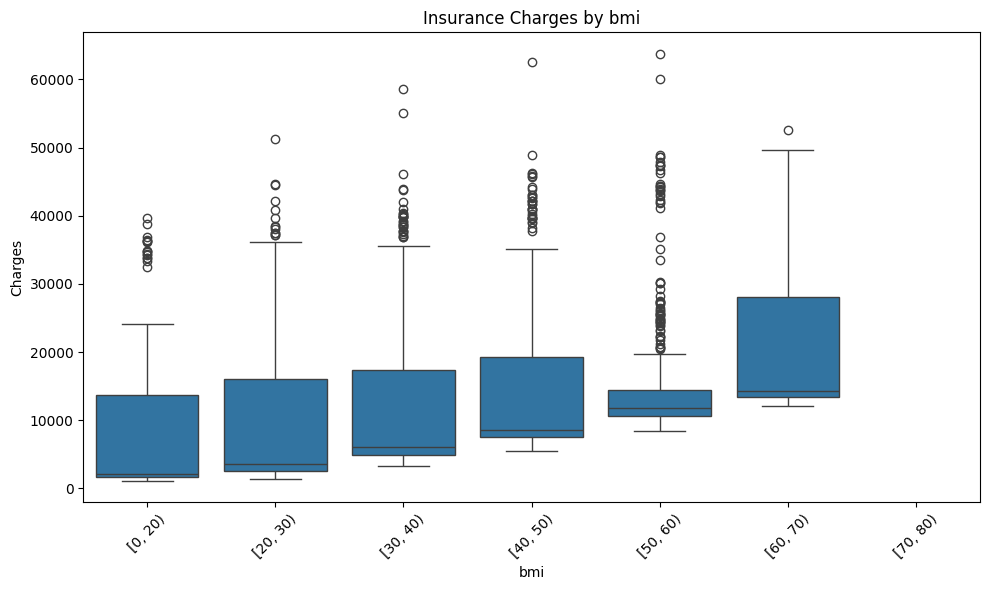

In [231]:
#Insurance Charges by bmi:
df_reg['bmi'] = pd.cut(df_reg['age'], bins=[0,20,30,40,50,60,70,80], right=False)
plt.figure(figsize=(10,6))
sns.boxplot(x='bmi', y='charges', data=df_reg)
plt.title("Insurance Charges by bmi")
plt.xlabel("bmi")
plt.ylabel("Charges")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




### Advanced Visualisation with Plotly  

This chart uses **Plotly**, a library for creating interactive visualisations.  

- **Interactivity**: Users can hover over points to see extra details, zoom in on specific BMI/Charges ranges, and toggle categories (e.g., smoker vs non-smoker).  
- **Advanced encoding**: The chart encodes multiple variables:  
  - `BMI` on the x-axis  
  - `Charges` on the y-axis  
  - `Smoker` status by colour  
  - `Age` by point size  
  - `Sex` and `Region` included in hover tooltips  

This goes beyond simple static plots by allowing **multi-dimensional exploration of the dataset**, making it a more powerful tool for identifying relationships and trends.

These plots show again that as BMI increases, insurance charges increases (although being a smoker has more of an affect on insurance charges than BMI), this seems consistent between regions.

In [232]:
# --- 1️⃣ Scatter Plot: BMI vs Charges by Smoker Status ---
fig_bmi_charges = px.scatter(
    df,
    x='bmi',
    y='charges',
    color='smoker',              # color by smoker
    size='age',                   # bubble size represents age
    hover_data=['sex', 'region'], # info on hover
    title='BMI vs Charges by Smoking Status'
)
fig_bmi_charges.show()  # Fully interactive

# --- 2️⃣ Histogram: Charges Distribution by Smoker Status ---
fig_charges_hist = px.histogram(
    df,
    x='charges',
    color='smoker',
    nbins=50,
    title='Charges Distribution by Smoking Status'
)
fig_charges_hist.show()  # Interactive histogram

# --- 3️⃣ Faceted Scatter: BMI vs Charges by Region ---
fig_region_scatter = px.scatter(
    df,
    x='bmi',
    y='charges',
    color='smoker',
    size='age',
    facet_col='region',           # facet by region
    hover_data=['sex'],
    title='BMI vs Charges by Smoker Status and Region'
)
fig_region_scatter.show()  # Interactive faceted scatter

# --- 4️⃣ Optional: Box Plot of Charges by Smoker ---
fig_charges_box = px.box(
    df,
    x='smoker',
    y='charges',
    color='smoker',
    points="all",                # show all individual points
    title='Charges by Smoker Status'
)
fig_charges_box.show()  # Interactive box plot



Using a Heatmap to combine age and biological sex shows that for each age group, males tended to have slightly higher average insurances than females. The heat map showing how charges varies for different combinations of agand biological sex shows that insurance increases with age regardless of if a person is male or female.


--- Heatmaps of Charges by Variable Combinations ---


C:\Users\joshu\AppData\Local\Temp\ipykernel_17520\2861760043.py:4: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



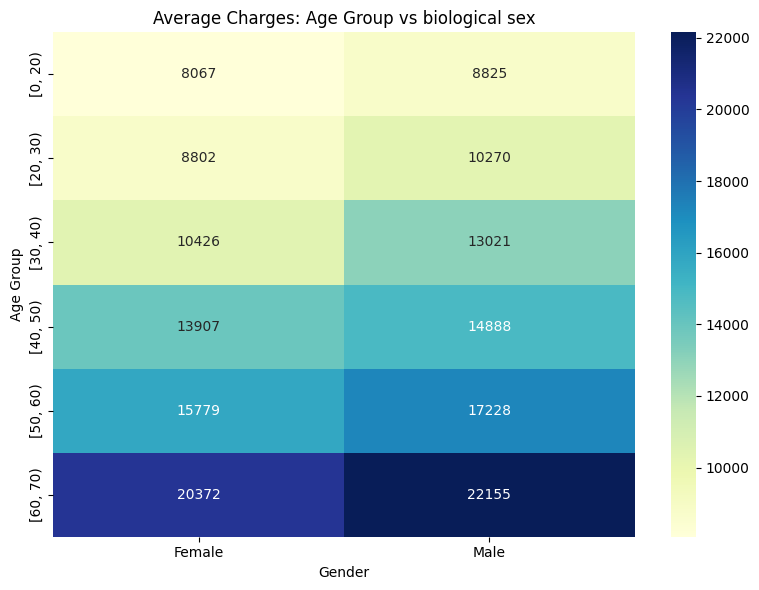

In [203]:
print("\n--- Heatmaps of Charges by Variable Combinations ---")

# Heatmap 1: Age group vs sex
pivot_age_gender = df_reg.pivot_table(
    index='age_group',
    columns='sex',
    values='charges',
    aggfunc='mean'
)
pivot_age_gender.columns = ['Female', 'Male']

plt.figure(figsize=(8,6))
sns.heatmap(pivot_age_gender, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Charges: Age Group vs biological sex")
plt.xlabel("Gender")
plt.ylabel("Age Group")
plt.tight_layout()
plt.show()

After seeing how effective one heatmap was at extrating insights, many heatmaps have been used to analyse a some combinations of variables (combined with age which is an independant variable).

From looking at the heatmaps in the code just below, I couldn't spot any clear difference between the individual variables (age, sex, bmi/	bmi_category, number of children, being a smoker, region person lives in) and those variables as combinations have much of an overall effect on insurance charges.

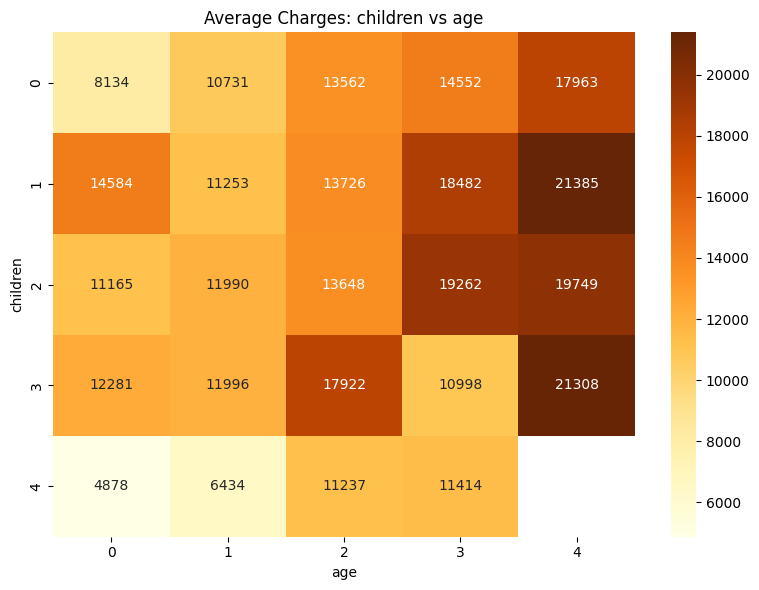

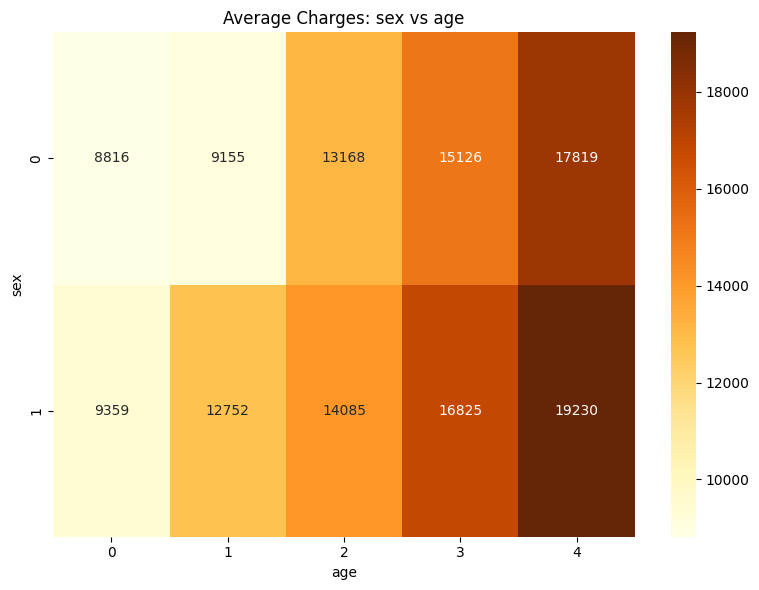

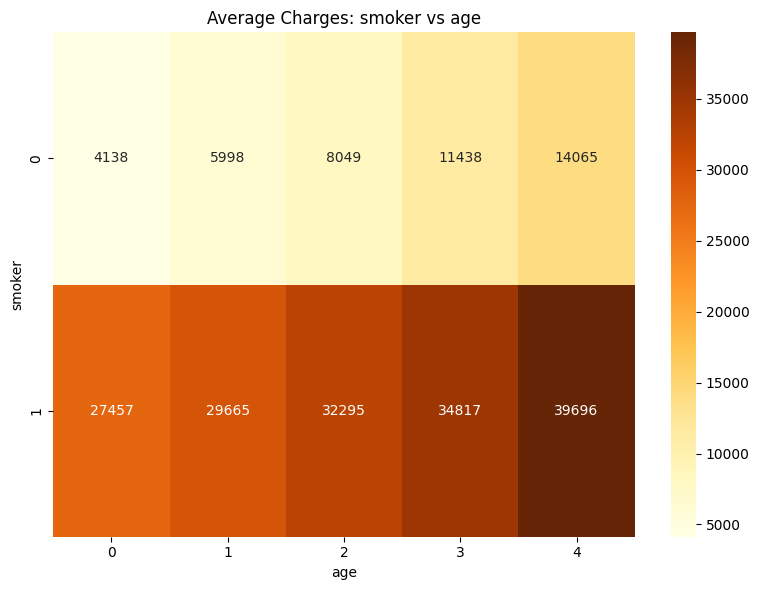

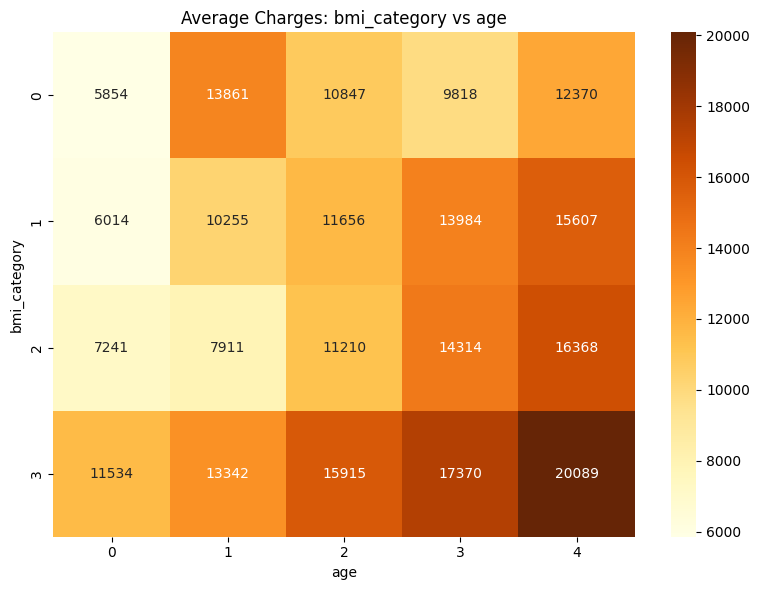

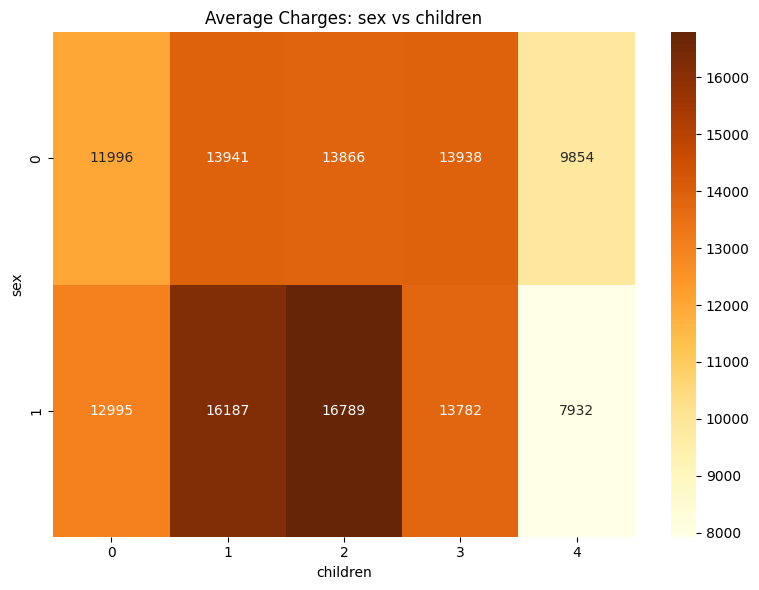

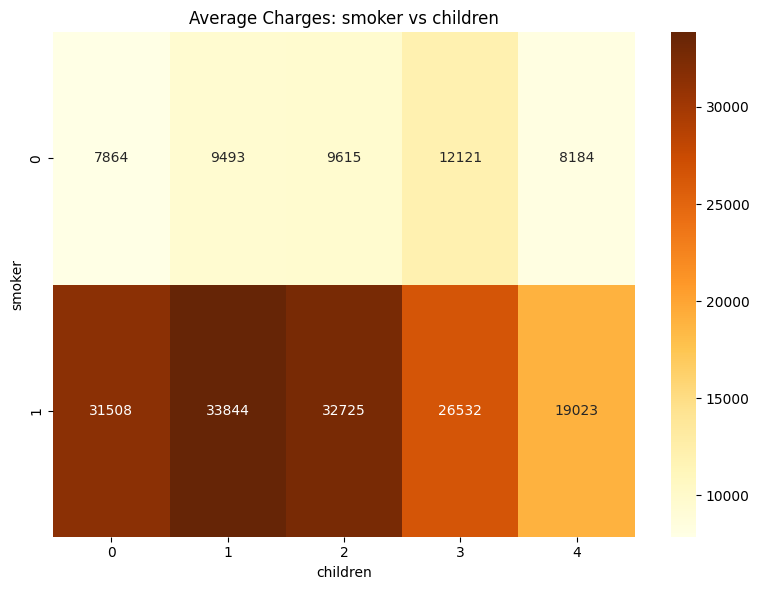

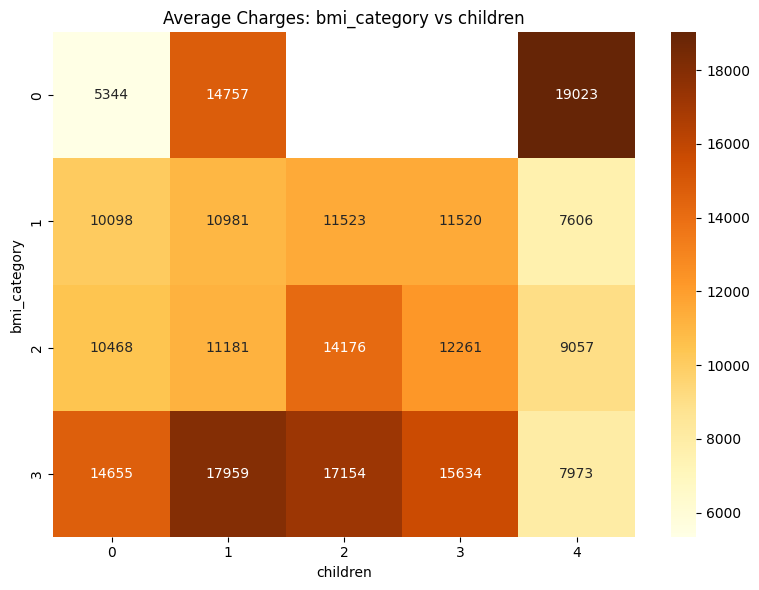

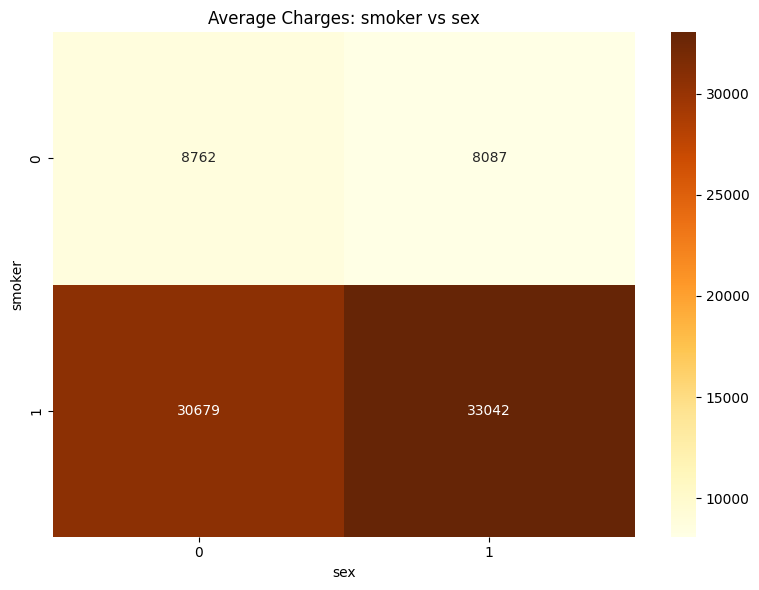

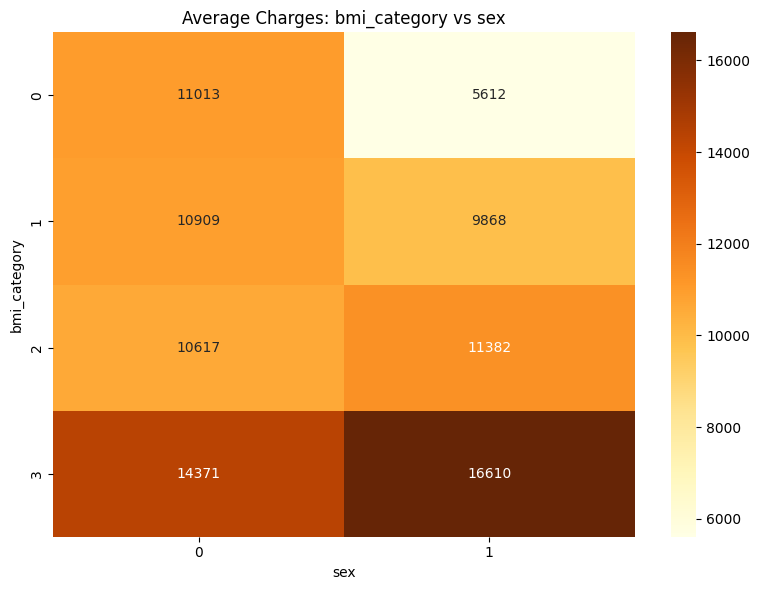

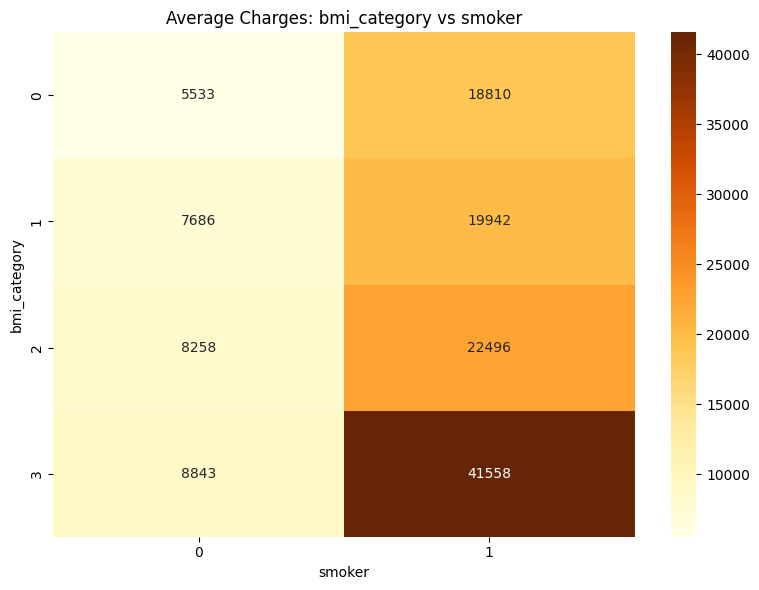

In [233]:
# Variables to check
vars_to_plot = ['age', 'children', 'sex', 'smoker', 'bmi_category']

# Encode categorical variables numerically for plotting
df_plot = df.copy()
df_plot['sex'] = df_plot['sex'].map({'female':0, 'male':1})
df_plot['smoker'] = df_plot['smoker'].map({'no':0, 'yes':1})
df_plot['bmi_category'] = df_plot['bmi_category'].map({'Underweight':0, 'Normal':1, 'Overweight':2, 'Obese':3})

# Identify categorical variables
categorical_vars = ['sex','smoker','bmi_category']

# Helper to bin numeric variables
def bin_numeric(series, bins=5):
    if series.name in categorical_vars:
        return series
    else:
        return pd.cut(series, bins=bins, labels=False)

# Loop through all pairs
pairs = list(itertools.combinations(vars_to_plot, 2))
for x_var, y_var in pairs:
    x_binned = bin_numeric(df_plot[x_var])
    y_binned = bin_numeric(df_plot[y_var])
    
    # Create pivot table: rows=y, columns=x, values=average charges
    heat_data = df_plot.pivot_table(index=y_binned, columns=x_binned, values='charges', aggfunc='mean')
    
    plt.figure(figsize=(8,6))
    sns.heatmap(heat_data, annot=True, fmt=".0f", cmap="YlOrBr")
    plt.title(f"Average Charges: {y_var} vs {x_var}")
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.tight_layout()
    plt.show()




Speaking of combinations of variables, exploratory data analyses has also been done to see using another heatmap if there are correlations between any variables (or if they can be analysed as affecting charges separately and independently of other). The previous bunch of heatmaps makes one think the variables are relatively independent but  a correlation plot to see if there were potential links or strong correlations between variables we missed. 

 This was done both for seeing which variables appear to affect charges to see if any of those variables also have an effect on each other (which could result in variables having a subtle indirect affect on charges by affecting other variables). This will later also be further explored using hypothesis tests.

Variables were also looked as in violin plots and pair plots to see from another perspective how varibles might interact.

### Understanding Violin Plots

In a violin plot, the **vertical axis represents the range of the numeric variable** being analyzed — in this case, insurance charges. The **top of the violin** corresponds to the highest charges, while the **bottom corresponds to the lowest charges** within each category or bin.  

The **width of the violin at any given point shows the density of the data** at that value. A wider section indicates that many data points fall around that level of charges, while a narrower section indicates fewer data points. Essentially, the width is like a smoothed histogram turned on its side.  

By combining these two dimensions, violin plots allow us to see both the **spread of charges** and **where most values cluster** within each category, making it easy to compare distributions across groups such as smoker status, BMI categories, or binned age ranges.

### Understanding Pair Plots

Pair plots display scatter plots for every pair of numeric variables in the dataset, along with histograms along the diagonal for each individual variable. The **scatter plots** show how two variables relate to each other, allowing us to visually assess correlations or trends. For example, in this dataset, we can see that insurance charges tend to increase with age, and that higher BMI often correlates with higher charges.

The **histograms on the diagonal** show the distribution of each variable individually, highlighting skewness, clustering, or outliers. Coloring points by a categorical variable, such as smoker status, allows us to easily compare groups and identify how features like smoking influence relationships between variables.

Overall, pair plots provide a comprehensive view of both **relationships between variables** and **the distribution of each variable**, making it a powerful tool for exploratory data analysis and identifying patterns that may influence insurance charges.


Both the violin plots and the pair plots showed similar findings to the heatmap and the boxplots earlier.

For example, the violin plots and the pair plots incidated that:

As age increases, insurance charges increases.
Smokers generally have much higher insurance charges than non smokers.
Males have more variability in insurance charges than females. 
Obese people generally have higher insurance charges than people who are not obese.

The highest insurance charges for people with one to two children is much lower than the highest insurance charges for people with less than one or more than two children.

A lot of the variables appear to be independant of each other, combinions of variables therefore likely won't have more of an effect on insurance charges than the sum of their individual effects on charges (although a correlation plot then a regression plot will later be done to check this).



--- Violin and Pair Plots of Charges by Variables ---


C:\Users\joshu\AppData\Local\Temp\ipykernel_17520\3361862393.py:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




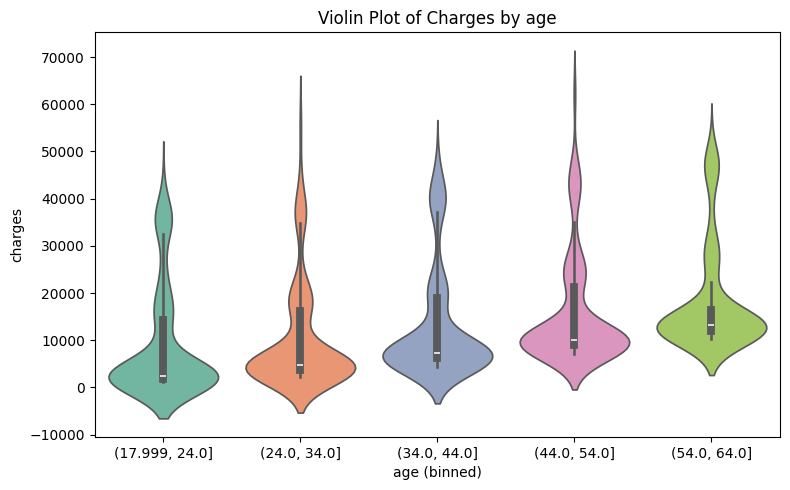

C:\Users\joshu\AppData\Local\Temp\ipykernel_17520\3361862393.py:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




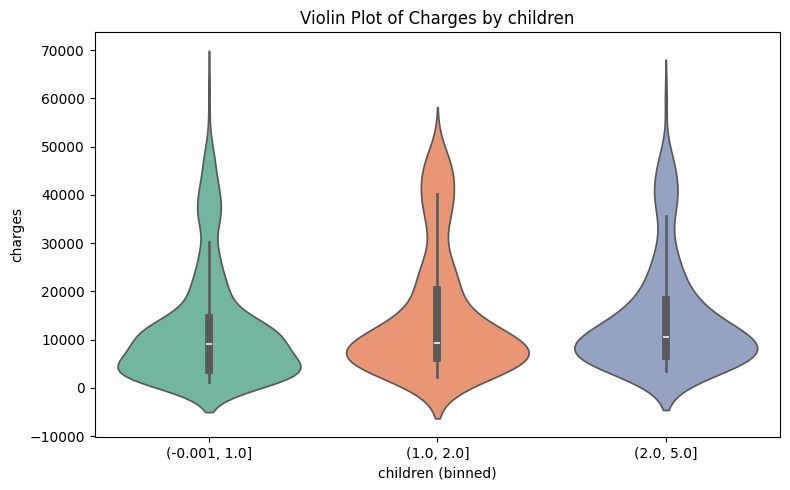

C:\Users\joshu\AppData\Local\Temp\ipykernel_17520\3361862393.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




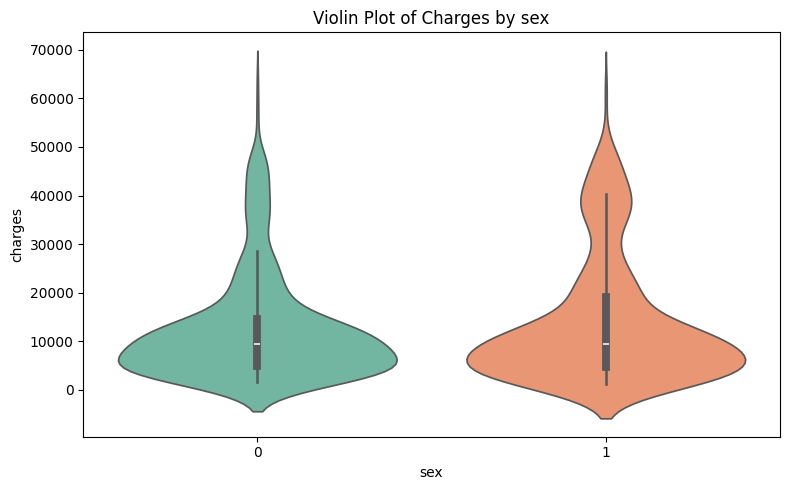

C:\Users\joshu\AppData\Local\Temp\ipykernel_17520\3361862393.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




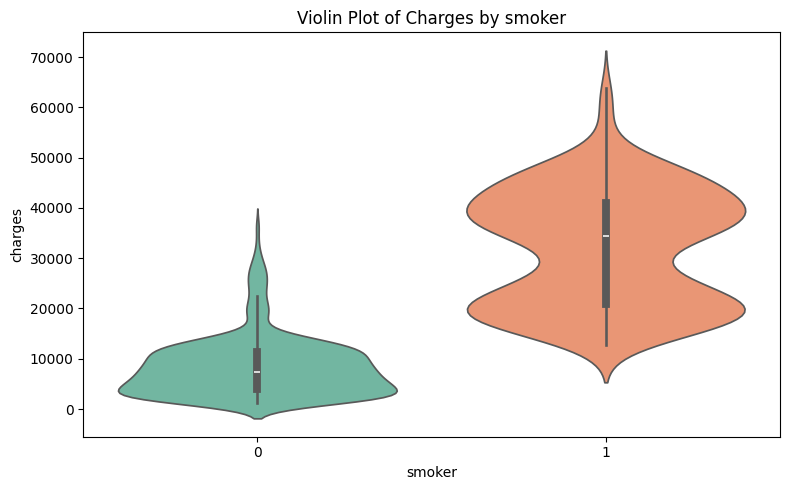

C:\Users\joshu\AppData\Local\Temp\ipykernel_17520\3361862393.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




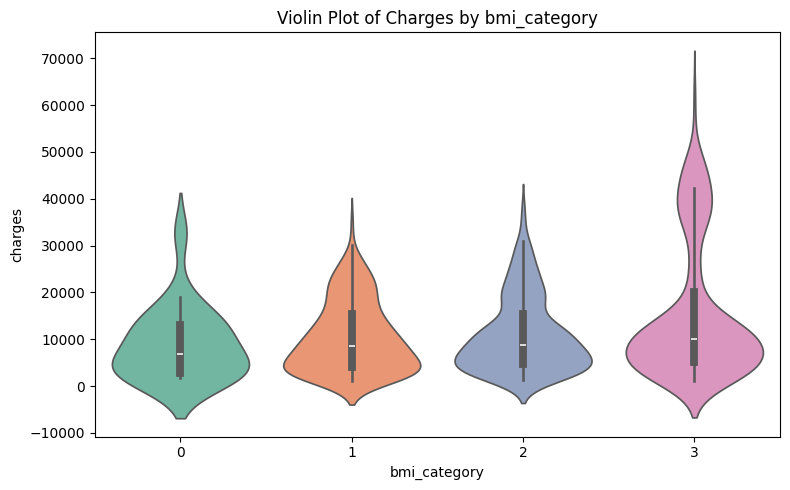

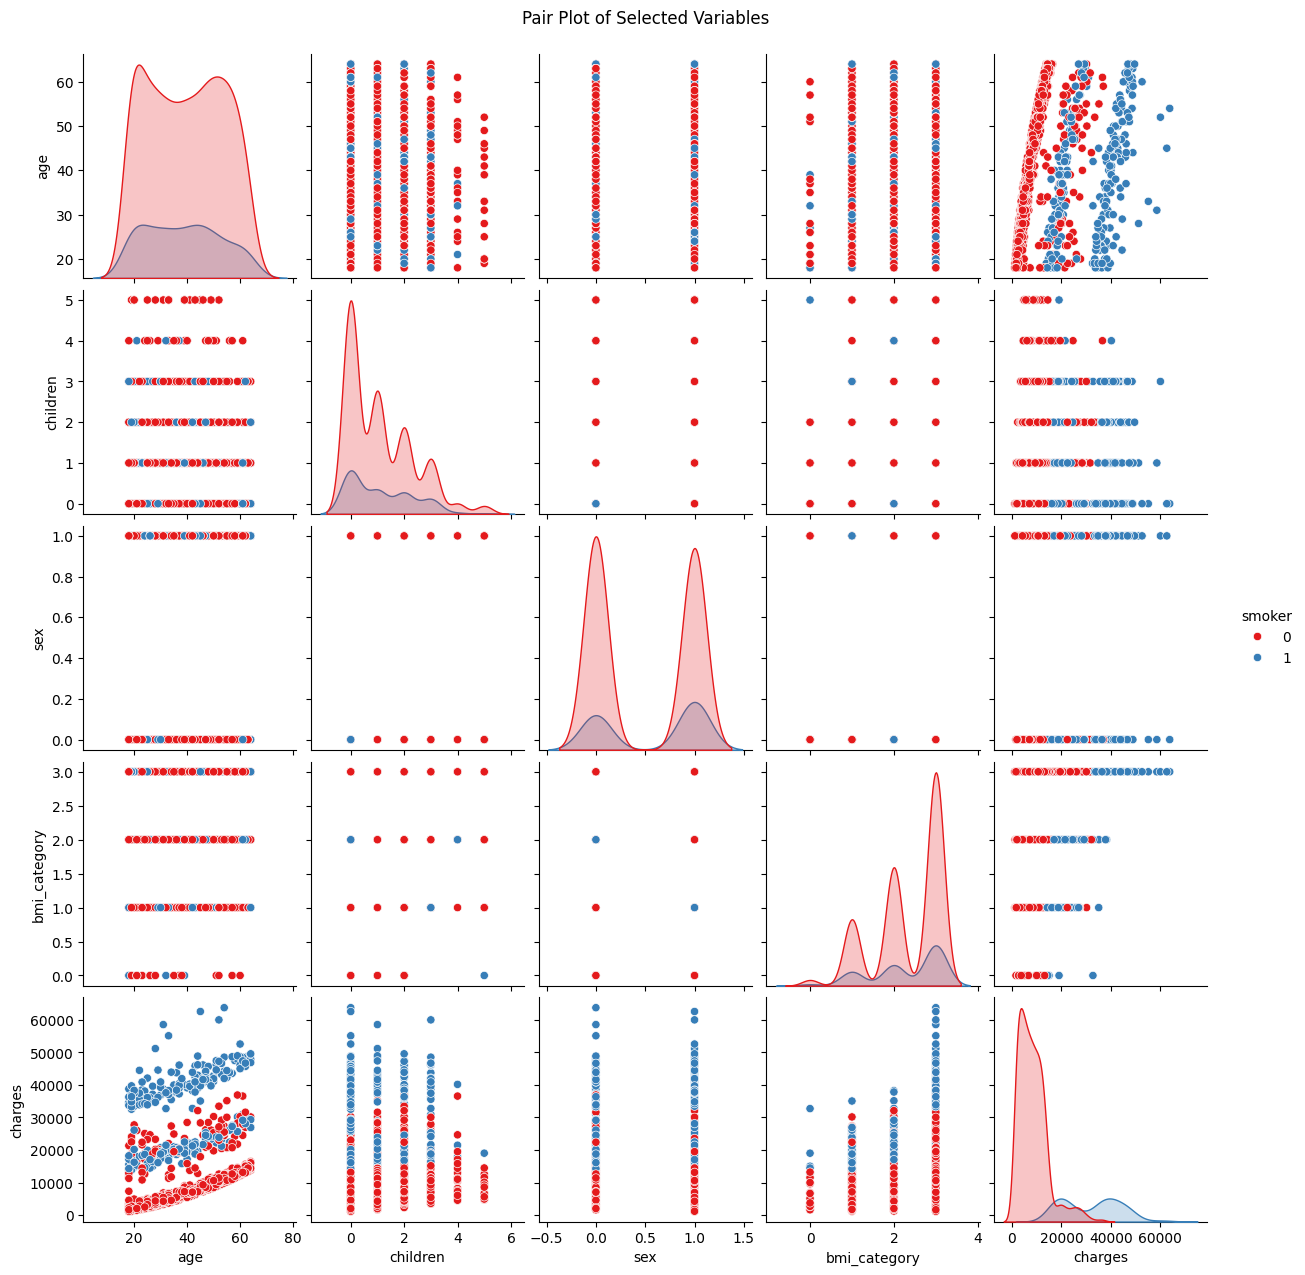

In [234]:
print("\n--- Violin and Pair Plots of Charges by Variables ---")

# Variables to plot
vars_to_plot = ['age', 'children', 'sex', 'smoker', 'bmi_category']

# Encode categorical variables numerically for plotting
df_plot = df.copy()
df_plot['sex'] = df_plot['sex'].map({'female':0, 'male':1})
df_plot['smoker'] = df_plot['smoker'].map({'no':0, 'yes':1})
df_plot['bmi_category'] = df_plot['bmi_category'].map({'Underweight':0, 'Normal':1, 'Overweight':2, 'Obese':3})

# Identify categorical variables
categorical_vars = ['sex','smoker','bmi_category']

# -----------------------
# 1️⃣ Violin Plots Loop
# -----------------------
for var in vars_to_plot:
    plt.figure(figsize=(8,5))
    
    # For categorical variables, use directly
    if var in categorical_vars:
        sns.violinplot(x=var, y='charges', data=df_plot, palette='Set2')
        plt.xlabel(var)
    else:
        # For numeric variables, bin into 5 quantiles for readability
        df_plot[f'{var}_bin'] = pd.qcut(df_plot[var], q=5, duplicates='drop')
        sns.violinplot(x=f'{var}_bin', y='charges', data=df_plot, palette='Set2')
        plt.xlabel(f'{var} (binned)')
    
    plt.title(f'Violin Plot of Charges by {var}')
    plt.tight_layout()
    plt.show()

# -----------------------
# 2️⃣ Pair Plot
# -----------------------
# Pair plot only for numeric variables
numeric_vars = ['age', 'children', 'sex', 'smoker', 'bmi_category', 'charges']

sns.pairplot(df_plot[numeric_vars], hue='smoker', palette='Set1')
plt.suptitle('Pair Plot of Selected Variables', y=1.02)
plt.show()

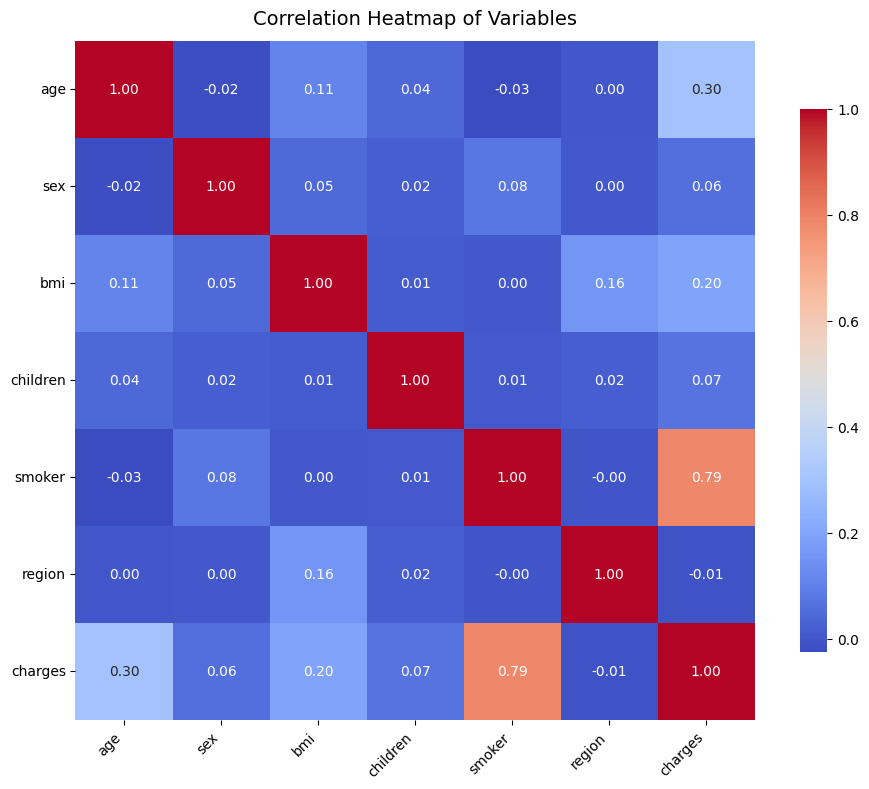

In [235]:


# --- Step 1: Prepare correlation dataset (excluding bmi_category) ---
df_corr = df.copy()
df_corr['sex'] = df_corr['sex'].map({'female': 0, 'male': 1})
df_corr['smoker'] = df_corr['smoker'].map({'no': 0, 'yes': 1})
df_corr['region'] = df_corr['region'].astype('category').cat.codes

# Compute correlation matrix (Pearson)
corr_matrix = df_corr.corr(numeric_only=True)

# --- Step 2: Plot heatmap ---
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    square=True,
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Heatmap of Variables", fontsize=14, pad=12)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


The strong positive correlation (0.79) between smokers and insurance charges suggests that smokers tend to have much higher insurance charges.
The moderate positive correlation (0.30) between age and charges indicates charges increases with age but not strongly.
The weak positive correlation (0.20) between BMI and charges indicates BMI increases with charges but not strongly.

Other variable pairs have correlations close to 0, meaning they are independent or only weakly linearly related.

With variables appearing to be either independent or having very weak linear relatinships, this suggest that a maths topic known as multilinear regression could be used to see how the combination of variables (age, sex, bmi, number of children, being a smoker, region lived in) relate to insurance charges.


Here (with the help of ChatGPT) a maths topic known as multilinear regression was used to see how much of the variation (R^2 value) is explained by each of the variables (did not need to include BMI catagories since BMI already in the regression).

The adjusted R squared values (when converted to a percentage by multiplying by 100) show the percentage of variation in charges explained by each variable.

The adjusted R squared value of 0.749 shows that the model explains 75% of the variation in insurance charges.

That’s quite good for insurance data. Smoking, age, BMI, and (to my surprise) children together capture most of the variability.


Full model R²: 0.750
Adjusted R²: 0.749

    Variable   Coefficient    StdError    t-value   p-value  Significant
0  Intercept -12252.854260  988.419717 -12.396408  0.000000         True
1        age    257.617513   11.906891  21.636002  0.000000         True
2        sex   -129.616242  333.418209  -0.388750  0.697523        False
3        bmi    323.551218   27.469015  11.778770  0.000000         True
4   children    476.343561  137.902805   3.454198  0.000569         True
5     smoker  23822.598804  412.592982  57.738740  0.000000         True
6     region    112.605247  150.547161   0.747973  0.454608        False


C:\Users\joshu\AppData\Local\Temp\ipykernel_17520\2170568861.py:69: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




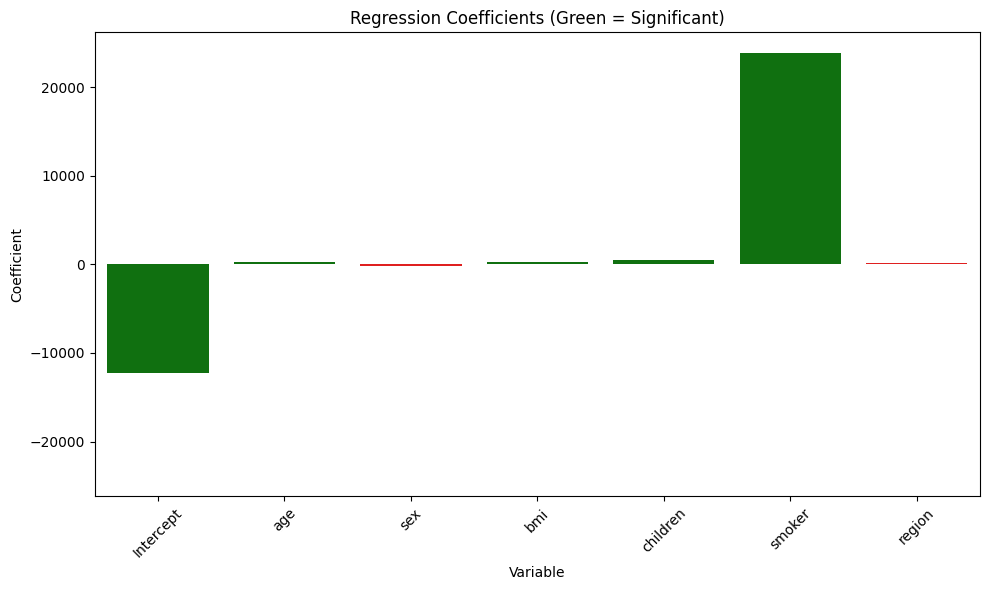


Regression Equation (Significant Variables Only):
charges = -12252.85 + 257.62*age + 323.55*bmi + 476.34*children + 23822.60*smoker


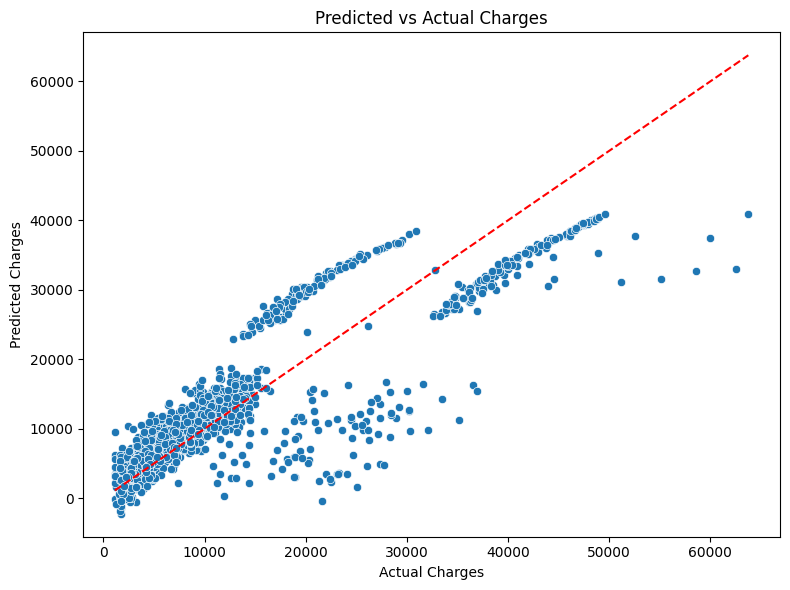

In [236]:
import scipy.stats as stats
from scipy.stats import t

# -----------------------------
# Copy df and encode variables
# -----------------------------
df_reg = df.copy()
df_reg['sex'] = df_reg['sex'].map({'female':0, 'male':1}).astype(float)
df_reg['smoker'] = df_reg['smoker'].map({'no':0,'yes':1}).astype(float)
df_reg['region'] = df_reg['region'].map({'northwest':0,'southeast':1,'southwest':2,'northeast':3}).astype(float)

# -----------------------------
# Step 1: Prepare predictors and target
# -----------------------------
predictors = [col for col in df_reg.columns if col != 'charges' and col != 'bmi_category']
X = df_reg[predictors].values.astype(float)
y = df_reg['charges'].values.astype(float)
X = np.column_stack((np.ones(len(X)), X))  # add intercept

# -----------------------------
# Step 2: Fit regression using pseudo-inverse
# -----------------------------
beta = np.linalg.pinv(X) @ y
y_pred = X @ beta

# -----------------------------
# Step 3: Full model R²
# -----------------------------
ss_total = np.sum((y - np.mean(y))**2)
ss_residual = np.sum((y - y_pred)**2)
r2_full = 1 - ss_residual / ss_total
print(f"Full model R²: {r2_full:.3f}")

# -----------------------------
# Step 3b: Adjusted R²
# -----------------------------
n, k = X.shape
r2_adj = 1 - (1 - r2_full) * (n - 1) / (n - k)
print(f"Adjusted R²: {r2_adj:.3f}\n")

# -----------------------------
# Step 4: Standard errors, t-values, p-values
# -----------------------------
residual_var = ss_residual / (n - k)
cov_beta = residual_var * np.linalg.pinv(X.T @ X)
se_beta = np.sqrt(np.diag(cov_beta))
t_values = beta / se_beta
p_values = [2 * (1 - t.cdf(np.abs(t_val), df=n-k)) for t_val in t_values]

# -----------------------------
# Step 5: Results DataFrame
# -----------------------------
results_df = pd.DataFrame({
    'Variable': ['Intercept'] + predictors,
    'Coefficient': beta,
    'StdError': se_beta,
    't-value': t_values,
    'p-value': p_values
})
results_df['Significant'] = results_df['p-value'] < 0.05
print(results_df)

# -----------------------------
# Step 6: Bar chart of coefficients
# -----------------------------
plt.figure(figsize=(10,6))
colors = ['green' if sig else 'red' for sig in results_df['Significant']]
max_val = max(abs(results_df['Coefficient'])) * 1.1
sns.barplot(x='Variable', y='Coefficient', data=results_df, palette=colors)
plt.title("Regression Coefficients (Green = Significant)")
plt.ylabel("Coefficient")
plt.xlabel("Variable")
plt.ylim(-max_val, max_val)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -----------------------------
# Step 7: Regression equation (significant only)
# -----------------------------
sig_df = results_df[results_df['Significant']].reset_index(drop=True)
equation_terms = [f"{sig_df['Coefficient'][i]:.2f}*{sig_df['Variable'][i]}" for i in range(1, len(sig_df))]
equation = f"charges = {sig_df['Coefficient'][0]:.2f} + " + " + ".join(equation_terms)
print("\nRegression Equation (Significant Variables Only):")
print(equation)

# -----------------------------
# Step 8: Predicted vs Actual Plot
# -----------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(x=y, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 45-degree line
plt.title("Predicted vs Actual Charges")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.tight_layout()
plt.show()




The regression equations tells us the following:

Intercept (-12,252.85): This is the expected charges when all predictors are 0 (age = 0, bmi = 0, children = 0, smoker = 0). While not realistic in practice, it’s mathematically necessary.

Age (257.62): Each additional year of age increases predicted charges by $257.62, holding other variables constant.

BMI (323.55): Each additional unit of BMI increases predicted charges by $323.55, holding other variables constant.

Children (476.34): Each additional child increases predicted charges by $476.34, holding other variables constant.

Smoker (23,822.60): Being a smoker increases predicted charges by $23,822.60 compared to non-smokers, holding other variables constant.

## 🔹 Hypothesis Testing and Statistical Analysis

In this section, we conduct statistical tests to explore key hypotheses about the dataset:

1. **Smoker vs Non-Smoker Charges** – Two-sample t-test with Cohen's d effect size.  
2. **BMI Correlation with Charges** – Pearson correlation and linear regression.  
3. **Children Effect on Charges** – Linear regression.  
4. **Regional Differences** – One-way ANOVA with eta squared effect size.  
5. **Gender Differences** – Two-sample t-test with Cohen's d.  
6. **BMI × Smoker Interaction** – Multiple regression to test interaction effect.

We also provide interpretations of effect sizes to assess practical significance.


In [237]:


# Ensure smoker_flag exists
if 'smoker_flag' not in df.columns:
    df['smoker_flag'] = df['smoker'].map({'yes': 1, 'no': 0})

# Utility function for Cohen's d (effect size for t-tests)
def cohen_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    pooled_std = np.sqrt(((nx - 1)*np.std(x, ddof=1)**2 + (ny - 1)*np.std(y, ddof=1)**2) / dof)
    return (np.mean(x) - np.mean(y)) / pooled_std

# Helper to interpret Cohen's d
def interpret_cohen_d(d):
    if abs(d) < 0.2:
        return "very small (practically negligible)"
    elif abs(d) < 0.5:
        return "small"
    elif abs(d) < 0.8:
        return "medium"
    else:
        return "large"

# Helper to interpret eta squared
def interpret_eta2(eta2):
    if eta2 < 0.01:
        return "very small"
    elif eta2 < 0.06:
        return "small"
    elif eta2 < 0.14:
        return "medium"
    else:
        return "large"

# Store all tables
tables = []

# -----------------------------
# H1: Smokers vs Non-Smokers
# -----------------------------
smokers = df[df.smoker=='yes']['charges']
nonsmokers = df[df.smoker=='no']['charges']
t_stat, p_val = stats.ttest_ind(smokers, nonsmokers)
effect_size = cohen_d(smokers, nonsmokers)
strength = interpret_cohen_d(effect_size)
direction = "Smokers higher" if smokers.mean() > nonsmokers.mean() else "Non-smokers higher"
interpretation = (
    f"{'Significant difference' if p_val<0.05 else 'No significant difference'} "
    f"(p = {p_val:.4f}). Effect size (Cohen's d = {effect_size:.2f}) is {strength}, "
    f"which means the difference is {strength} in practical terms."
)
tables.append(["Smoker status", "Two-sample t-test", f"Cohen's d = {effect_size:.2f}", f"{p_val:.4f}", direction, interpretation])

# -----------------------------
# H2: BMI correlation with charges
# -----------------------------
r, p_val = stats.pearsonr(df['bmi'], df['charges'])
direction = "Positive correlation" if r > 0 else "Negative correlation"
strength = "weak" if abs(r)<0.3 else "moderate" if abs(r)<0.6 else "strong"
interpretation = (
    f"{'Significant' if p_val<0.05 else 'Not significant'} correlation (p = {p_val:.4f}). "
    f"Correlation coefficient r = {r:.2f} shows a {strength} {direction}, "
    f"meaning BMI {'increases' if r>0 else 'decreases'} charges to that degree."
)
tables.append(["BMI", "Pearson correlation", f"r = {r:.2f}", f"{p_val:.4f}", direction, interpretation])

# Linear regression for H2
model_bmi = smf.ols('charges ~ bmi', data=df).fit()
coef = model_bmi.params['bmi']
p_val_reg = model_bmi.pvalues['bmi']
interpretation_reg = (
    f"{'Significant predictor' if p_val_reg<0.05 else 'Not significant predictor'} (p = {p_val_reg:.4f}). "
    f"Each unit increase in BMI is associated with {coef:.2f} more in charges."
)
tables.append(["BMI", "Linear regression", f"Coef = {coef:.2f}", f"{p_val_reg:.4f}", "Positive slope" if coef>0 else "Negative slope", interpretation_reg])

# -----------------------------
# H3: Children effect
# -----------------------------
model_children = smf.ols('charges ~ children', data=df).fit()
coef = model_children.params['children']
p_val_reg = model_children.pvalues['children']
direction = "More children -> higher charges" if coef>0 else "More children -> lower charges"
interpretation = (
    f"{'Significant' if p_val_reg<0.05 else 'Not significant'} effect (p = {p_val_reg:.4f}). "
    f"Each additional child changes charges by {coef:.2f}."
)
tables.append(["Children", "Linear regression", f"Coef = {coef:.2f}", f"{p_val_reg:.4f}", direction, interpretation])

# -----------------------------
# H4: Region effect (ANOVA)
# -----------------------------
groups = [df[df.region==r]['charges'] for r in df.region.unique()]
f_stat, p_val = stats.f_oneway(*groups)
# Effect size (eta squared)
ss_between = sum([len(g)*(g.mean()-df.charges.mean())**2 for g in groups])
ss_total = sum((df.charges - df.charges.mean())**2)
eta2 = ss_between/ss_total
strength = interpret_eta2(eta2)
direction = df.groupby('region')['charges'].mean().idxmax()
interpretation = (
    f"{'Significant' if p_val<0.05 else 'Not significant'} difference (p = {p_val:.4f}). "
    f"Effect size eta² = {eta2:.2f}, which is {strength}. "
    f"The region with the highest average charges is {direction}."
)
tables.append(["Region", "One-way ANOVA", f"Eta² = {eta2:.2f}", f"{p_val:.4f}", f"Highest in {direction}", interpretation])

# -----------------------------
# H5: Gender effect
# -----------------------------
male = df[df.sex=='male']['charges']
female = df[df.sex=='female']['charges']
t_stat, p_val = stats.ttest_ind(male, female)
effect_size = cohen_d(male, female)
strength = interpret_cohen_d(effect_size)
direction = "Male higher" if male.mean() > female.mean() else "Female higher"
interpretation = (
    f"{'Significant difference' if p_val<0.05 else 'No significant difference'} (p = {p_val:.4f}). "
    f"Cohen's d = {effect_size:.2f}, which is {strength} in size. "
    f"This means the gender difference is {strength} in real-world terms."
)
tables.append(["Gender", "Two-sample t-test", f"Cohen's d = {effect_size:.2f}", f"{p_val:.4f}", direction, interpretation])

# -----------------------------
# H6: BMI x Smoker interaction
# -----------------------------
df['bmi_smoker'] = df['bmi'] * df['smoker_flag']
model_interaction = smf.ols('charges ~ bmi + smoker_flag + bmi_smoker', data=df).fit()
coef = model_interaction.params['bmi_smoker']
p_val_reg = model_interaction.pvalues['bmi_smoker']
direction = "Smoking amplifies BMI effect" if coef>0 else "Smoking reduces BMI effect"
interpretation = (
    f"{'Significant interaction' if p_val_reg<0.05 else 'Not significant'} (p = {p_val_reg:.4f}). "
    f"Each unit of BMI × smoker_flag changes charges by {coef:.2f}, meaning smoking "
    f"{'increases' if coef>0 else 'weakens'} the effect of BMI on charges."
)
tables.append(["BMI x Smoker", "Multiple regression", f"Coef = {coef:.2f}", f"{p_val_reg:.4f}", direction, interpretation])

# -----------------------------
# Convert to DataFrame
# -----------------------------

hypothesis_table = pd.DataFrame(tables, columns=["Factor", "Test", "Effect Size", "p-value", "Direction/Insight", "Interpretation"])

# Display neatly
# Ensure all text in columns is displayed fully
pd.set_option('display.max_colwidth', None)  # Show full text in all columns
pd.set_option('display.max_rows', None)      # Show all rows

# Display the hypothesis table
display(hypothesis_table)


,Factor,Test,Effect Size,p-value,Direction/Insight,Interpretation
0,Smoker status,Two-sample t-test,Cohen's d = 3.16,0.0000,Smokers higher,"Significant difference (p = 0.0000). Effect size (Cohen's d = 3.16) is large, which means the difference is large in practical terms."
1,BMI,Pearson correlation,r = 0.20,0.0000,Positive correlation,"Significant correlation (p = 0.0000). Correlation coefficient r = 0.20 shows a weak Positive correlation, meaning BMI increases charges to that degree."
2,BMI,Linear regression,Coef = 393.87,0.0000,Positive slope,Significant predictor (p = 0.0000). Each unit increase in BMI is associated with 393.87 more in charges.
3,Children,Linear regression,Coef = 683.09,0.0129,More children -> higher charges,Significant effect (p = 0.0129). Each additional child changes charges by 683.09.
4,Region,One-way ANOVA,Eta² = 0.01,0.0309,Highest in southeast,"Significant difference (p = 0.0309). Effect size eta² = 0.01, which is very small. The region with the highest average charges is southeast."
5,Gender,Two-sample t-test,Cohen's d = 0.11,0.0361,Male higher,"Significant difference (p = 0.0361). Cohen's d = 0.11, which is very small (practically negligible) in size. This means the gender difference is very small (practically negligible) in real-world terms."
6,BMI x Smoker,Multiple regression,Coef = 1389.76,0.0000,Smoking amplifies BMI effect,"Significant interaction (p = 0.0000). Each unit of BMI × smoker_flag changes charges by 1389.76, meaning smoking increases the effect of BMI on charges."


# 🖥️ Dashboard Preparation

This code block prepares the dataset for a business intelligence dashboard (e.g., Tableau or Power BI).  

**Steps included:**

1. Identify continuous and categorical columns based on the dataset guide.  
2. Scale continuous numeric columns (`age` and `bmi`) for better visual consistency.  
3. Ensure categorical columns, including `bmi_category`, are treated as strings for BI tools.  
4. Precompute aggregations (mean `charges`) by `region`, `smoker`, `children`, and `bmi_category`.  
5. Export the cleaned, dashboard-ready dataset to `dashboard_data.csv`.



In [238]:
import numpy as np
import pandas as pd

# -------------------------------
# 1️⃣ Define columns based on data guide
# -------------------------------
continuous_cols = ['age', 'bmi']
categorical_cols = ['sex', 'children', 'smoker', 'region']
target_col = 'charges'

print("Continuous numeric columns to scale:", continuous_cols)
print("Categorical columns for BI:", categorical_cols + ['bmi_category'])

# -------------------------------
# 2️⃣ Scale continuous numeric columns
# -------------------------------
df_scaled = df_clean.copy()  # Keep original data intact

for col in continuous_cols:
    mean = df_scaled[col].mean()
    std = df_scaled[col].std()
    df_scaled[col] = (df_scaled[col] - mean) / std

print("\nScaled continuous numeric features:\n")
print(df_scaled[continuous_cols].head())

# -------------------------------
# 3️⃣ Ensure categorical columns are strings for BI
# -------------------------------
for col in categorical_cols + ['bmi_category']:  # include existing BMI category
    df_scaled[col] = df_scaled[col].astype(str)

# -------------------------------
# 4️⃣ Precompute aggregations for dashboard visualisations
# -------------------------------
aggregations = {
    'region': df_scaled.groupby('region')[target_col].mean().reset_index(),
    'smoker': df_scaled.groupby('smoker')[target_col].mean().reset_index(),
    'children': df_scaled.groupby('children')[target_col].mean().reset_index(),
    'bmi_category': df_scaled.groupby('bmi_category')[target_col].mean().reset_index()
}

print("\nAggregations ready for dashboard visualisations.")

# -------------------------------
# 5️⃣ Optionally export for Tableau / Power BI
# -------------------------------
df_scaled.to_csv('dashboard_data.csv', index=False)
print("\nDashboard-ready dataset saved as 'dashboard_data.csv'.")


Continuous numeric columns to scale: ['age', 'bmi']
Categorical columns for BI: ['sex', 'children', 'smoker', 'region', 'bmi_category']

Scaled continuous numeric features:

        age       bmi
0 -1.439879 -0.452990
1 -1.511082  0.509231
2 -0.799051  0.383011
3 -0.443036 -1.304564
4 -0.514239 -0.292347

Aggregations ready for dashboard visualisations.

Dashboard-ready dataset saved as 'dashboard_data.csv'.


## -------------------------------
## 🧠 Prepare Training and Testing Data
## -------------------------------
We split our cleaned and scaled dataset into features (X) and target (y),
 convert categorical variables into dummy variables for modeling, and then perform a train/test split.

- `X` contains all the predictors (numeric + categorical converted to dummy variables)
- `y` is the target variable (`charges`) we want to predict
- We use an 80/20 split for training and testing
 - Random seed is set for reproducibility


In [239]:

# -------------------------------
# 1️⃣ Prepare features (X) and target (y)
# -------------------------------
feature_cols = ['age', 'bmi', 'children']  # Include numeric features
categorical_cols = ['sex', 'smoker', 'region', 'bmi_category']

# Convert categorical variables into dummy variables
df_model = pd.get_dummies(df_scaled[feature_cols + categorical_cols], drop_first=True)

X = df_model.values
y = df_scaled['charges'].values

# -------------------------------
# 2️⃣ Manual train/test split (80/20)
# -------------------------------
rng = np.random.default_rng(seed=42)  # For reproducibility
indices = np.arange(len(X))
rng.shuffle(indices)

split = int(0.8 * len(X))
X_train, X_test = X[indices[:split]], X[indices[split:]]
y_train, y_test = y[indices[:split]], y[indices[split:]]

print("Training and testing data prepared:")
print(f"Train size: {X_train.shape[0]} samples")
print(f"Test size: {X_test.shape[0]} samples")

Training and testing data prepared:
Train size: 1069 samples
Test size: 268 samples


# -------------------------------
### 🏋️ Train a Linear Regression Model
# -------------------------------
We train a Linear Regression model using the training dataset.

- The model learns to predict `charges` from the features in `X_train`.
- After training, we evaluate it on the test dataset to check how well it generalizes.
- We print R² scores and RMSE for both train and test datasets.


In [240]:
# Explanations for each feature
feature_explanations = {
    'age': 'The insured person\'s age.',
    'bmi': 'Body Mass Index: measure of body fat based on height and weight.',
    'children': 'Number of dependents covered by insurance.',
    'smoker_flag': 'Whether the insured is a smoker (1 = yes, 0 = no).'
}

# 1️⃣ Identify numeric columns
target_col = 'charges'
numeric_cols = df_clean.select_dtypes(include=np.number).columns.tolist()
if target_col in numeric_cols:
    numeric_cols.remove(target_col)

# Continuous if >=10 unique values
continuous_cols = [col for col in numeric_cols if df_clean[col].nunique() >= 10]

# Treat other numeric columns as binary/categorical
binary_cols = [col for col in numeric_cols if col not in continuous_cols]

# 2️⃣ Encode 'yes'/'no' columns as binary flags
for col in df_clean.columns:
    if set(df_clean[col].dropna().unique()) <= {'yes', 'no'}:
        df_clean[col + '_flag'] = df_clean[col].map({'yes': 1, 'no': 0})
        binary_cols.append(col + '_flag')

# 3️⃣ Prepare features and target
X = df_clean[continuous_cols + binary_cols].copy()
y = df_clean[target_col].copy()

# 4️⃣ Scale continuous features
scaler = StandardScaler()
X[continuous_cols] = scaler.fit_transform(X[continuous_cols])

# 5️⃣ Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6️⃣ Fit Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# 7️⃣ Extract intercept and coefficients
intercept = model.intercept_
coefficients = dict(zip(X.columns, model.coef_))

print("Intercept:", intercept)
print("\nCoefficients with explanations and effect interpretation:")
for feature, coef in coefficients.items():
    explanation = feature_explanations.get(feature, "No explanation available.")
    
    # Interpret effect
    if feature in continuous_cols:
        effect = f"Each 1 unit increase in {feature} changes charges by {coef:.2f} on average."
    else:
        effect = f"Being {feature.replace('_flag','')} = 1 changes charges by {coef:.2f} on average."
    
    print(f"- {feature}: {coef:.2f} → {explanation} | {effect}")

# 8️⃣ Evaluate model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel performance on test set:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.3f}")

# 9️⃣ Compare R² to baseline
baseline_r2 = 0.749
if r2 > baseline_r2:
    print(f"\nThe R² value of {r2:.3f} exceeds the general regression baseline of {baseline_r2}.")
    print("This indicates that this model explains more variance in charges than the baseline model.")
else:
    print(f"\nThe R² value of {r2:.3f} is below the general regression baseline of {baseline_r2}.")
    print("This indicates that this model explains less variance in charges than the baseline model.")




Intercept: 8295.04481759771

Coefficients with explanations and effect interpretation:
- age: 3492.42 → The insured person's age. | Each 1 unit increase in age changes charges by 3492.42 on average.
- bmi: 1906.35 → Body Mass Index: measure of body fat based on height and weight. | Each 1 unit increase in bmi changes charges by 1906.35 on average.
- sex: -99.70 → No explanation available. | Being sex = 1 changes charges by -99.70 on average.
- children: 534.12 → Number of dependents covered by insurance. | Being children = 1 changes charges by 534.12 on average.
- smoker: 23052.15 → No explanation available. | Being smoker = 1 changes charges by 23052.15 on average.
- region: -237.63 → No explanation available. | Being region = 1 changes charges by -237.63 on average.

Model performance on test set:
Mean Squared Error (MSE): 35493102.61
R-squared (R²): 0.807

The R² value of 0.807 exceeds the general regression baseline of 0.749.
This indicates that this model explains more variance in